<a href="https://colab.research.google.com/github/ArifAygun/Magnimind-Jan2023-Assignments/blob/main/Office_Hour_Data_Exploration_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **2. HANDLING WITH VARIABLE TYPE ASSIGNMENT**

## 2.2 Using the movie data, we have studied in this lesson. Complete the following tasks:

- Select a continuous and a categorical variable from the movie dataset and discuss the variable type of this variable. Discuss further in detail the type of selected continuous and categorical variables.
- Categorize a variable of your choice and assign a name to it
- Count the number of rows for each category

In [1]:
from pandas.io.formats import style
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings

from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine

warnings.filterwarnings('ignore')
sns.set(style='whitegrid')
pd.options.display.float_format = '{:2f}'.format
plt.rcParams['figure.dpi'] = 100

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import os

def file_locator(file_name):
  main_dir = os.getcwd()

  for dir, folder, files in os.walk(main_dir):
    for file in files:
      if file == file_name:
        file_path = os.path.join(dir,file)
  return file_path

file_path = file_locator('movies.csv')
df = pd.read_csv(file_path)
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.100000,757074,333.130000,76.000000
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.000000,485820,126.460000,65.000000
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.300000,157606,138.120000,62.000000
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.200000,60545,270.320000,59.000000
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.200000,393727,325.020000,40.000000


In [4]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 12 entries, Rank to Metascore
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [5]:
#df.describe(include ='0')
df.describe(include='object')

,Title,Genre,Description,Director,Actors
count,1000,1000,1000,1000,1000
unique,999,207,1000,644,996
top,The Host,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,Ridley Scott,"Jennifer Lawrence, Josh Hutcherson, Liam Hemsw..."
freq,2,50,1,8,2


### 2.2.a. Select a continuous and a categorical variable from the movie dataset and discuss the variable type of this variable. 

In [6]:
variable_type = pd.Series(['continuous numerical - ordinal',
                           'string variable - nominal',
                           'categorical - nominal',
                           'string variable - nominal',
                           'categorical - nominal',
                           'categorical - nominal',
                           'numerical discrete - interval',
                           'discrete numerical - ratio',
                           'dicrete numerical - ordinal',
                           'continonus numerical - ordinal',
                           'continuous numerical - ratio',
                           'discrete numerical - ordinal'], index = df.dtypes.index)

In [7]:
df_dtype = pd.concat([df.dtypes, df.nunique(), round(df.nunique()*100/len(df)), variable_type], axis=1)
df_dtype.columns = ['data type', 'No. of categories', 'categories/sample ratio %', 'variable_type']
df_dtype

,data type,No. of categories,categories/sample ratio %,variable_type
Rank,int64,1000,100.000000,continuous numerical - ordinal
Title,object,999,100.000000,string variable - nominal
Genre,object,207,21.000000,categorical - nominal
Description,object,1000,100.000000,string variable - nominal
Director,object,644,64.000000,categorical - nominal
Actors,object,996,100.000000,categorical - nominal
Year,int64,11,1.000000,numerical discrete - interval
Runtime (Minutes),int64,94,9.000000,discrete numerical - ratio
Rating,float64,55,6.000000,dicrete numerical - ordinal
Votes,int64,997,100.000000,continonus numerical - ordinal


### 2.2.b. Categorize a variable of your choice and assign a name to it

In [8]:
df['Revenue Category'] = pd.cut(df['Revenue (Millions)'], bins=3, right=True, labels=['low', 'medium', 'high'])
df['Revenue (Millions)'].value_counts(bins=3)

(-0.9380000000000001, 312.21]    835
(312.21, 624.42]                  34
(624.42, 936.63]                   3
Name: Revenue (Millions), dtype: int64

In [9]:
# example with range
binned_range = pd.cut(range(1,1000), bins=3, right=True, labels=['low', 'medium', 'high'])
binned_range


['low', 'low', 'low', 'low', 'low', ..., 'high', 'high', 'high', 'high', 'high']
Length: 999
Categories (3, object): ['low' < 'medium' < 'high']

### 2.2.c.Count the number of rows for each category

In [10]:
df['Revenue Category'].value_counts()

low       835
medium     34
high        3
Name: Revenue Category, dtype: int64

Metascore and Rating can be converted to discrete numerical

## 2.3. Is it possible to convert categorical variable into numerical one? If so, how can you make that?

In [11]:
d = dict(enumerate(df.Genre.astype('category').cat.categories))
df['Genre_discrete'] = df.Genre.astype('category').cat.codes

In [12]:
d

{0: 'Action',
 1: 'Action,Adventure',
 2: 'Action,Adventure,Biography',
 3: 'Action,Adventure,Comedy',
 4: 'Action,Adventure,Crime',
 5: 'Action,Adventure,Drama',
 6: 'Action,Adventure,Family',
 7: 'Action,Adventure,Fantasy',
 8: 'Action,Adventure,Horror',
 9: 'Action,Adventure,Mystery',
 10: 'Action,Adventure,Romance',
 11: 'Action,Adventure,Sci-Fi',
 12: 'Action,Adventure,Thriller',
 13: 'Action,Adventure,Western',
 14: 'Action,Biography,Crime',
 15: 'Action,Biography,Drama',
 16: 'Action,Comedy',
 17: 'Action,Comedy,Crime',
 18: 'Action,Comedy,Drama',
 19: 'Action,Comedy,Family',
 20: 'Action,Comedy,Fantasy',
 21: 'Action,Comedy,Horror',
 22: 'Action,Comedy,Mystery',
 23: 'Action,Comedy,Romance',
 24: 'Action,Comedy,Sci-Fi',
 25: 'Action,Comedy,Sport',
 26: 'Action,Crime,Drama',
 27: 'Action,Crime,Fantasy',
 28: 'Action,Crime,Mystery',
 29: 'Action,Crime,Sci-Fi',
 30: 'Action,Crime,Sport',
 31: 'Action,Crime,Thriller',
 32: 'Action,Drama,Family',
 33: 'Action,Drama,Fantasy',
 34: 'A

In [13]:
df['Genre_discrete']

0       11
1       85
2      195
3       92
4        7
      ... 
995    144
996    190
997    170
998     61
999    121
Name: Genre_discrete, Length: 1000, dtype: int16

In [14]:
df['Genre_discrete_categories'] = df['Genre_discrete'].map(d)

In [15]:
df['Genre_discrete'].nunique() == df.Genre.nunique

False

In [16]:
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Revenue Category,Genre_discrete,Genre_discrete_categories
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.100000,757074,333.130000,76.000000,medium,11,"Action,Adventure,Sci-Fi"
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.000000,485820,126.460000,65.000000,low,85,"Adventure,Mystery,Sci-Fi"
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.300000,157606,138.120000,62.000000,low,195,"Horror,Thriller"
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.200000,60545,270.320000,59.000000,low,92,"Animation,Comedy,Family"
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.200000,393727,325.020000,40.000000,medium,7,"Action,Adventure,Fantasy"


## 2.4. While continuous data is generally preferred over discrete data, please indicate circumstances where discrete is the preferred data type although continuous data is available for the same characteristic.

In classification problems, categorical data are used as they fit the classification techniques and method.

In regression problems, continuous data is required.

## 2.5. While continuous data is measured and attribute data is counted, there is sometimes confusion if some specific dataset should be considered continuous or attribute. Provide some examples of confusing datasets and your inference.

- While measuring time we think that it is hour, month, year, so it will be attribute data but in actually it is continuous data because it can be break into minutes, seconds like that. But we can convert it into attribute data.


- Another confusing dataset when we are talking about money, when we withdraw money from atm it comes like 1000, 2000, 250, 2475 but if we see our bank balance in our records online then we see the figures like 200.35, so it is continuous data because it has several infinite values so it is continuous data.


- Another confusing dataset is percentage data or we can say that derived data, how we will consider it continuous or attribute. It depends on source data what it is actually according to that % data is decided. For example number of students taking this class divided by total number of graduate students is attribute data because a student can not be 3.5, 4.5

# **3. MISSING VALUES ASSIGNMENT**



In this assignment, you'll be working with the U.S. Education Dataset from Kaggle. The data gives detailed, state-level information on several facets of the state of education on an annual basis. To learn more about the data and the column descriptions, click the Kaggle link above.

To complete this assignment, submit a link to a Jupyter Notebook containing your solutions to the following tasks:

1. Determine all the variable types and find the fraction of the missing values for each variable. Answer the following questions as you work through this challenge, and then paste a link to your Notebook.
2. Notice that the data has a time dimension (year). For this assignment, forget about time and treat all the observations as if they're from the same year. Choose a strategy to deal with the missing values for each variable. For which variables would filling in the missing values with some value make sense? For which might tossing out the records entirely make sense?
3. Now, take into account the time factor. Replicate your second answer, but this time, fill in the missing values by using a statistic that is calculated within the year of the observation. For example, if you want to fill in a missing value for a variable with the mean of that variable, calculate the mean by using only the observations for that specific year.
4. This time, fill in the missing values using interpolation (extrapolation).
5. Compare your results for the second, third, and fourth questions. Do you find any meaningful differences?

## 3.1. Determine all the variable types and find the fraction of the missing values for each variable. Answer the following questions as you work through this challenge, and then paste a link to your Notebook.

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
import pandas as pd
import numpy as np
import os

def file_locator(file_name):
  main_dir = os.getcwd()

  for dir, folder, files in os.walk(main_dir):
    for file in files:
      if file == file_name:
        file_path = os.path.join(dir,file)
  return file_path

file_path = file_locator('states_all.csv')
df = pd.read_csv(file_path)
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.000000,304177.000000,1659028.000000,715680.000000,2653798.000000,1481703.000000,...,57948.000000,58025.000000,41167.000000,NaN,NaN,731634.000000,208.000000,252.000000,207.000000,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.000000,106780.000000,720711.000000,222100.000000,972488.000000,498362.000000,...,9748.000000,8789.000000,6714.000000,NaN,NaN,122487.000000,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.000000,297888.000000,1369815.000000,1590376.000000,3401580.000000,1435908.000000,...,55433.000000,49081.000000,37410.000000,NaN,NaN,673477.000000,215.000000,265.000000,209.000000,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.000000,178571.000000,958785.000000,574603.000000,1743022.000000,964323.000000,...,34632.000000,36011.000000,27651.000000,NaN,NaN,441490.000000,210.000000,256.000000,211.000000,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.000000,2072470.000000,16546514.000000,7641041.000000,27138832.000000,14358922.000000,...,418418.000000,363296.000000,270675.000000,NaN,NaN,5254844.000000,208.000000,261.000000,202.000000,NaN


In [19]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715 entries, 0 to 1714
Columns: 25 entries, PRIMARY_KEY to AVG_READING_8_SCORE
dtypes: float64(22), int64(1), object(2)
memory usage: 335.1+ KB


In [20]:
df_datatype = pd.concat([df.dtypes, df.nunique(),
                         round(df.nunique()*100/len(df), 2),
                         df.isnull().sum(),
                         round(df.isnull().sum()*100/len(df),2)],
                        axis=1)

In [21]:
df_datatype

,0,1,2,3,4
PRIMARY_KEY,object,1715,100.000000,0,0.000000
STATE,object,53,3.090000,0,0.000000
YEAR,int64,33,1.920000,0,0.000000
ENROLL,float64,1224,71.370000,491,28.630000
TOTAL_REVENUE,float64,1274,74.290000,440,25.660000
FEDERAL_REVENUE,float64,1275,74.340000,440,25.660000
STATE_REVENUE,float64,1251,72.940000,440,25.660000
LOCAL_REVENUE,float64,1275,74.340000,440,25.660000
TOTAL_EXPENDITURE,float64,1275,74.340000,440,25.660000
INSTRUCTION_EXPENDITURE,float64,1275,74.340000,440,25.660000


In [22]:
df_datatype.columns = ['data type', 'No. of categories', 'No. of categories %', 'missing values', 'missing values %']

In [23]:
df_datatype.columns

Index(['data type', 'No. of categories', 'No. of categories %',
       'missing values', 'missing values %'],
      dtype='object')

In [24]:
df_datatype.sort_values(by='missing values %', ascending=False, inplace=True)

In [25]:
df_datatype

,data type,No. of categories,No. of categories %,missing values,missing values %
AVG_READING_8_SCORE,float64,39,2.270000,1153,67.230000
AVG_MATH_4_SCORE,float64,50,2.920000,1150,67.060000
AVG_MATH_8_SCORE,float64,57,3.320000,1113,64.900000
AVG_READING_4_SCORE,float64,43,2.510000,1065,62.100000
GRADES_1_8_G,float64,1020,59.480000,695,40.520000
GRADES_9_12_G,float64,1070,62.390000,644,37.550000
ENROLL,float64,1224,71.370000,491,28.630000
OTHER_EXPENDITURE,float64,1222,71.250000,491,28.630000
SUPPORT_SERVICES_EXPENDITURE,float64,1275,74.340000,440,25.660000
CAPITAL_OUTLAY_EXPENDITURE,float64,1275,74.340000,440,25.660000


In [26]:
df_datatype = df_datatype.loc[df_datatype['missing values']!=0]
df_datatype

,data type,No. of categories,No. of categories %,missing values,missing values %
AVG_READING_8_SCORE,float64,39,2.270000,1153,67.230000
AVG_MATH_4_SCORE,float64,50,2.920000,1150,67.060000
AVG_MATH_8_SCORE,float64,57,3.320000,1113,64.900000
AVG_READING_4_SCORE,float64,43,2.510000,1065,62.100000
GRADES_1_8_G,float64,1020,59.480000,695,40.520000
GRADES_9_12_G,float64,1070,62.390000,644,37.550000
ENROLL,float64,1224,71.370000,491,28.630000
OTHER_EXPENDITURE,float64,1222,71.250000,491,28.630000
SUPPORT_SERVICES_EXPENDITURE,float64,1275,74.340000,440,25.660000
CAPITAL_OUTLAY_EXPENDITURE,float64,1275,74.340000,440,25.660000


In [27]:
df_datatype[df_datatype.index=='AVG_READING_8_SCORE']['data type']

AVG_READING_8_SCORE    float64
Name: data type, dtype: object

### 3.2 Notice that the data has a time dimension (year). For this assignment, forget about time and treat all the observations as if they're from the same year. Choose a strategy to deal with the missing values for each variable. For which variables would filling in the missing values with some value make sense? For which might tossing out the records entirely make sense?

In [28]:
# drop those variable with more than 50% missing value
df_datatype.iloc[np.where(df_datatype['missing values %']>50)]

,data type,No. of categories,No. of categories %,missing values,missing values %
AVG_READING_8_SCORE,float64,39,2.270000,1153,67.230000
AVG_MATH_4_SCORE,float64,50,2.920000,1150,67.060000
AVG_MATH_8_SCORE,float64,57,3.320000,1113,64.900000
AVG_READING_4_SCORE,float64,43,2.510000,1065,62.100000


In [29]:
columns_to_drop = df_datatype.iloc[np.where(df_datatype['missing values %'] > 50)].index

print(f""" columns, {columns_to_drop} can be dropped since more than 50% of data is missing, for the rest of variable, the missing value can be replaced by some values""")

 columns, Index(['AVG_READING_8_SCORE', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE'],
      dtype='object') can be dropped since more than 50% of data is missing, for the rest of variable, the missing value can be replaced by some values


In [30]:
df.drop(columns_to_drop.to_list(), axis=1, inplace=True)
df

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.000000,304177.000000,1659028.000000,715680.000000,2653798.000000,1481703.000000,...,NaN,174053.000000,8224.000000,55460.000000,57948.000000,58025.000000,41167.000000,NaN,NaN,731634.000000
1,1992_ALASKA,ALASKA,1992,NaN,1049591.000000,106780.000000,720711.000000,222100.000000,972488.000000,498362.000000,...,NaN,37451.000000,2371.000000,10152.000000,9748.000000,8789.000000,6714.000000,NaN,NaN,122487.000000
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.000000,297888.000000,1369815.000000,1590376.000000,3401580.000000,1435908.000000,...,NaN,609114.000000,2544.000000,53497.000000,55433.000000,49081.000000,37410.000000,NaN,NaN,673477.000000
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.000000,178571.000000,958785.000000,574603.000000,1743022.000000,964323.000000,...,NaN,145212.000000,808.000000,33511.000000,34632.000000,36011.000000,27651.000000,NaN,NaN,441490.000000
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.000000,2072470.000000,16546514.000000,7641041.000000,27138832.000000,14358922.000000,...,NaN,2044688.000000,59067.000000,431763.000000,418418.000000,363296.000000,270675.000000,NaN,NaN,5254844.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2019_VIRGINIA,VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1711,2019_WASHINGTON,WASHINGTON,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1712,2019_WEST_VIRGINIA,WEST_VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1713,2019_WISCONSIN,WISCONSIN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
df_datatype.drop(index=columns_to_drop, axis=0, inplace=True)

In [32]:
#keep the columns with at least 50% non-null values
# thresh should be int. it is optional but it cannot be combined with how. It require that many non-NA values.
df.dropna(axis='columns', thresh=round(len(df)/2), inplace=True)

In [33]:
df.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G
count,1715.000000,1224.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1224.000000,1275.000000,1542.000000,1632.000000,1632.000000,1632.000000,1632.000000,1020.000000,1071.000000,1632.000000
mean,2002.075219,917541.566176,9102044.929412,767779.864314,4223742.902745,4110522.156078,9206242.121569,4768010.484706,2682586.519216,429950.933824,903467.454902,17840.958495,68810.962010,69166.507966,68106.537377,58420.870711,577954.717647,282069.084967,913969.494485
std,9.568621,1066514.198574,11759620.227524,1146991.507325,5549734.818394,5489561.973467,11992791.012446,6300569.339670,3357214.499350,534789.311211,1329473.468334,30016.603510,80671.033008,79957.990356,77965.847263,67438.530709,675783.663429,330709.787555,1055892.946669
min,1986.000000,43866.000000,465650.000000,31020.000000,0.000000,22093.000000,481665.000000,265549.000000,139963.000000,11541.000000,12708.000000,96.000000,5122.000000,4577.000000,3371.000000,2572.000000,37698.000000,13530.000000,68449.000000
25%,1994.000000,264514.500000,2189503.500000,189957.500000,1165776.000000,715121.000000,2170404.000000,1171336.500000,638076.000000,103449.250000,181507.000000,2199.750000,19029.750000,18971.500000,19594.250000,16076.500000,164925.000000,80608.000000,248083.250000
50%,2002.000000,649933.500000,5085826.000000,403548.000000,2537754.000000,2058996.000000,5242672.000000,2658253.000000,1525471.000000,271704.000000,510428.000000,8258.000000,48122.000000,49087.000000,47880.000000,39408.000000,405111.500000,186919.000000,645805.000000
75%,2010.000000,1010532.000000,10845163.000000,827932.000000,5055547.500000,4755293.000000,10744201.500000,5561959.000000,3222924.500000,517222.250000,966148.000000,22691.750000,78864.250000,78504.250000,78976.000000,69397.250000,643975.250000,322328.000000,1043420.500000
max,2019.000000,6307022.000000,89217262.000000,9990221.000000,50904567.000000,36105265.000000,85320133.000000,43964520.000000,26058021.000000,3995951.000000,10223657.000000,256222.000000,535379.000000,493415.000000,500143.000000,498403.000000,3929869.000000,2013687.000000,6441557.000000


In [34]:
df_impute_median = df.copy(deep=True)
#When deep=True (default), a new object will be created with a copy of the calling object's data and indices. 
# Modifications to the data or indices of the copy will not be reflected in the original object.
for col in df.columns:
  if col in df_datatype.index:
    df_impute_median[col] = df_impute_median[col].fillna(df_impute_median[col].median())

In [35]:
df_impute_median.isnull().sum()

PRIMARY_KEY                     0
STATE                           0
YEAR                            0
ENROLL                          0
TOTAL_REVENUE                   0
FEDERAL_REVENUE                 0
STATE_REVENUE                   0
LOCAL_REVENUE                   0
TOTAL_EXPENDITURE               0
INSTRUCTION_EXPENDITURE         0
SUPPORT_SERVICES_EXPENDITURE    0
OTHER_EXPENDITURE               0
CAPITAL_OUTLAY_EXPENDITURE      0
GRADES_PK_G                     0
GRADES_KG_G                     0
GRADES_4_G                      0
GRADES_8_G                      0
GRADES_12_G                     0
GRADES_1_8_G                    0
GRADES_9_12_G                   0
GRADES_ALL_G                    0
dtype: int64

In [36]:
df_impute_median = df.copy(deep=True)
#When deep=True (default), a new object will be created with a copy of the calling object's data and indices. 
# Modifications to the data or indices of the copy will not be reflected in the original object.

df_impute_median.fillna(df_impute_median.median(numeric_only=True), inplace=True)


In [37]:
df_impute_median.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G
count,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000
mean,2002.075219,840926.079009,8071644.737609,674332.622157,3791185.983090,3584183.083965,8189349.495627,4226731.596501,2385717.231487,384645.251895,802629.344023,16874.281050,67809.688630,68194.730029,67127.643732,57500.714286,507910.381633,246339.257143,900991.271137
std,9.568621,908985.364120,10289171.151097,1001590.781494,4841024.301221,4816898.445530,10483486.037844,5509629.199016,2938209.504722,457373.768558,1158985.783310,28607.512850,78818.783078,78117.005891,76178.524321,65911.908766,527930.156960,265330.275258,1031617.415313
min,1986.000000,43866.000000,465650.000000,31020.000000,0.000000,22093.000000,481665.000000,265549.000000,139963.000000,11541.000000,12708.000000,96.000000,5122.000000,4577.000000,3371.000000,2572.000000,37698.000000,13530.000000,68449.000000
25%,1994.000000,464688.000000,2992297.000000,260277.000000,1618602.000000,1162579.500000,3004448.500000,1570157.000000,899691.000000,162478.000000,260813.000000,2536.500000,20944.000000,20486.500000,20518.500000,17949.000000,315810.500000,145790.000000,280001.000000
50%,2002.000000,649933.500000,5085826.000000,403548.000000,2537754.000000,2058996.000000,5242672.000000,2658253.000000,1525471.000000,271704.000000,510428.000000,8258.000000,48122.000000,49087.000000,47880.000000,39408.000000,405111.500000,186919.000000,645805.000000
75%,2010.000000,869448.500000,8165744.000000,673280.000000,3837822.000000,3484107.500000,8220253.000000,4133617.500000,2442635.000000,407999.500000,812272.000000,19689.000000,75726.000000,77052.000000,76719.500000,68023.000000,481590.500000,252807.500000,1002840.500000
max,2019.000000,6307022.000000,89217262.000000,9990221.000000,50904567.000000,36105265.000000,85320133.000000,43964520.000000,26058021.000000,3995951.000000,10223657.000000,256222.000000,535379.000000,493415.000000,500143.000000,498403.000000,3929869.000000,2013687.000000,6441557.000000


In [38]:
df_impute_median.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715 entries, 0 to 1714
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   1715 non-null   object 
 1   STATE                         1715 non-null   object 
 2   YEAR                          1715 non-null   int64  
 3   ENROLL                        1715 non-null   float64
 4   TOTAL_REVENUE                 1715 non-null   float64
 5   FEDERAL_REVENUE               1715 non-null   float64
 6   STATE_REVENUE                 1715 non-null   float64
 7   LOCAL_REVENUE                 1715 non-null   float64
 8   TOTAL_EXPENDITURE             1715 non-null   float64
 9   INSTRUCTION_EXPENDITURE       1715 non-null   float64
 10  SUPPORT_SERVICES_EXPENDITURE  1715 non-null   float64
 11  OTHER_EXPENDITURE             1715 non-null   float64
 12  CAPITAL_OUTLAY_EXPENDITURE    1715 non-null   float64
 13  GRA

In [39]:
df_impute_median['YEAR'].nunique()
df_impute_median['YEAR'].value_counts()

1992    53
2003    53
2017    53
1990    53
2015    53
2013    53
2011    53
2009    53
2007    53
2005    53
2019    53
2002    53
1996    53
1994    53
2000    53
1998    53
1991    51
1995    51
1989    51
1988    51
1987    51
1986    51
2016    51
2014    51
2004    51
1997    51
2012    51
2010    51
1999    51
1993    51
2006    51
2001    51
2008    51
Name: YEAR, dtype: int64

In [40]:
df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G'],
      dtype='object')

## 3.3. Now, take into account the time factor. Replicate your second answer, but this time, fill in the missing values by using a statistic that is calculated within the year of the observation. For example, if you want to fill in a missing value for a variable with the mean of that variable, calculate the mean by using only the observations for that specific year.

In [41]:
df_time_series = df.copy(deep=True)

In [42]:
#df_time_series.groupby('YEAR'),['ENROLL'].unique()

df_time_series.groupby('YEAR')['ENROLL'].unique()


YEAR
1986                                                [nan]
1987                                                [nan]
1988                                                [nan]
1989                                                [nan]
1990                                                [nan]
1991                                                [nan]
1992                                                [nan]
1993    [727716.0, 121156.0, 676297.0, 311432.0, 51297...
1994    [730004.0, 123868.0, 708482.0, 312695.0, 41204...
1995    [727480.0, 125421.0, 735018.0, 447757.0, 52994...
1996    [735912.0, 126189.0, 764681.0, 452907.0, 54604...
1997    [737386.0, 128143.0, 783552.0, 457349.0, 55958...
1998    [739321.0, 130633.0, 794331.0, 456355.0, 57272...
1999    [737639.0, 133508.0, 814157.0, 451981.0, 58392...
2000    [730184.0, 132822.0, 814807.0, 450751.0, 59419...
2001    [728532.0, 131985.0, 834387.0, 449693.0, 60450...
2002    [726367.0, 133010.0, 859588.0, 449161.0, 61369...
2003    [

The pivot_table() function accepts a Pandas dataframe as an imput whereas the crosstab() function accepts both Pandas dataframes, and NumPy arrays. The crosstab() function can be used to view to normalize data. The pivot_table() function does not contain any default functionality for data normalization.

In [43]:
pd.set_option('Display.max_column', None, 'Display.max_row', None)

In [44]:
#original data frame
df.head(10)

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.000000,304177.000000,1659028.000000,715680.000000,2653798.000000,1481703.000000,735036.000000,NaN,174053.000000,8224.000000,55460.000000,57948.000000,58025.000000,41167.000000,NaN,NaN,731634.000000
1,1992_ALASKA,ALASKA,1992,NaN,1049591.000000,106780.000000,720711.000000,222100.000000,972488.000000,498362.000000,350902.000000,NaN,37451.000000,2371.000000,10152.000000,9748.000000,8789.000000,6714.000000,NaN,NaN,122487.000000
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.000000,297888.000000,1369815.000000,1590376.000000,3401580.000000,1435908.000000,1007732.000000,NaN,609114.000000,2544.000000,53497.000000,55433.000000,49081.000000,37410.000000,NaN,NaN,673477.000000
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.000000,178571.000000,958785.000000,574603.000000,1743022.000000,964323.000000,483488.000000,NaN,145212.000000,808.000000,33511.000000,34632.000000,36011.000000,27651.000000,NaN,NaN,441490.000000
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.000000,2072470.000000,16546514.000000,7641041.000000,27138832.000000,14358922.000000,8520926.000000,NaN,2044688.000000,59067.000000,431763.000000,418418.000000,363296.000000,270675.000000,NaN,NaN,5254844.000000
5,1992_COLORADO,COLORADO,1992,NaN,3185173.000000,163253.000000,1307986.000000,1713934.000000,3264826.000000,1642466.000000,1035970.000000,NaN,364760.000000,7410.000000,47588.000000,50648.000000,45025.000000,34533.000000,NaN,NaN,612635.000000
6,1992_CONNECTICUT,CONNECTICUT,1992,NaN,3834302.000000,143542.000000,1342539.000000,2348221.000000,3721338.000000,2148041.000000,1142600.000000,NaN,48542.000000,5731.000000,41319.000000,38058.000000,33691.000000,28366.000000,NaN,NaN,488476.000000
7,1992_DELAWARE,DELAWARE,1992,NaN,645233.000000,45945.000000,420942.000000,178346.000000,638784.000000,372722.000000,194915.000000,NaN,30595.000000,463.000000,8025.000000,8272.000000,8012.000000,6129.000000,NaN,NaN,104321.000000
8,1992_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,1992,NaN,709480.000000,64749.000000,0.000000,644731.000000,742893.000000,329160.000000,316679.000000,NaN,47272.000000,4818.000000,6667.000000,5832.000000,5000.000000,3433.000000,NaN,NaN,80937.000000
9,1992_FLORIDA,FLORIDA,1992,NaN,11506299.000000,788420.000000,5683949.000000,5033930.000000,11305642.000000,5166374.000000,3410440.000000,NaN,1667826.000000,31464.000000,161701.000000,164416.000000,142372.000000,100835.000000,NaN,NaN,1981407.000000


In [45]:
df_grouped_by_year = pd.pivot_table(data = df_time_series, index='YEAR', values=df_datatype.index, aggfunc=[np.median, len], dropna=True)
df_grouped_by_year

median                                             \
     CAPITAL_OUTLAY_EXPENDITURE        ENROLL FEDERAL_REVENUE  GRADES_12_G   
YEAR                                                                         
1986                        NaN           NaN             NaN 36222.000000   
1987                        NaN           NaN             NaN 38596.000000   
1988                        NaN           NaN             NaN 37538.000000   
1989                        NaN           NaN             NaN 35618.000000   
1990                        NaN           NaN             NaN 34645.000000   
1991                        NaN           NaN             NaN 34638.000000   
1992              194081.000000           NaN   211627.000000 34533.000000   
1993              196098.000000 509814.000000   196584.000000 34744.000000   
1994              223352.000000 518425.000000   224106.000000 35464.000000   
1995              243365.000000 638880.000000   248319.000000 35480.000000   
1996              318829.000000 635678.000000   270455.000000 36113.000000   
1997              369529.000000 631592.000000   278209.000000 37568.000000   
1998              340415.000000 645232.000000   313550.000000 38769.000000   
1999              448757.000000 652731.000000   323924.000000 39111.000000   
2000              428541.000000 646467.000000   354829.000000 39409.000000   
2001              419442.000000 643730.000000   385896.000000 38379.000000   
2002              542302.000000 654363.000000   438583.000000 38902.000000   
2003              469251.000000 660782.000000   482904.000000 38834.000000   
2004              533020.000000 663886.000000   516520.000000 39200.000000   
2005              496778.000000 674502.000000   552628.000000 39157.000000   
2006              592789.000000 648313.000000   580810.000000 40267.000000   
2007              647628.000000 646360.000000   574090.000000 40927.000000   
2008              760566.000000 662971.000000   629423.000000 43189.000000   
2009              784529.000000 662774.000000   675576.000000 43097.000000   
2010              747498.000000 663802.000000   945973.000000 43723.000000   
2011              661195.000000 665109.000000   969288.000000 43928.000000   
2012              666528.000000 665478.000000   773014.000000 44032.000000   
2013              616590.000000 671445.000000   707522.000000 43732.000000   
2014              620745.000000 670069.000000   681230.000000 43862.000000   
2015              606254.000000 671715.000000   688990.000000 44659.000000   
2016              686104.000000 672777.000000   690724.000000 45277.000000   
2017                        NaN           NaN             NaN 46516.000000   
2019                        NaN           NaN             NaN          NaN   

                                                                          \
      GRADES_1_8_G   GRADES_4_G   GRADES_8_G GRADES_9_12_G  GRADES_ALL_G   
YEAR                                                                       
1986           NaN 41114.000000 40066.000000           NaN 558415.000000   
1987           NaN 43254.000000 40269.000000           NaN 572421.000000   
1988           NaN 43540.000000 39317.000000           NaN 574890.000000   
1989           NaN 45931.000000 40762.000000           NaN 578580.000000   
1990           NaN 47341.000000 42319.000000           NaN 579087.000000   
1991           NaN 49387.000000 43176.000000           NaN 593030.000000   
1992           NaN 49666.000000 45025.000000           NaN 612635.000000   
1993           NaN 48242.000000 47665.000000           NaN 625062.000000   
1994           NaN 48233.000000 49332.000000           NaN 640521.000000   
1995           NaN 47407.000000 50091.000000           NaN 645586.000000   
1996           NaN 47018.000000 49641.000000           NaN 652816.000000   
1997 397019.000000 47241.000000 50385.000000 186592.000000 659273.000000   
1998 393530.000000 48707.000000 49580.000000 186742.000000 655687.000000   


In [46]:
#df_grouped_by_year.loc[2009, 'CAPITAL_OUTLAY_EXPENDITURE']

In [47]:
for col in df.columns:
  if col in df_datatype.index: # if df[col].isnull().sum!=0

  #values = {i:df_grouped_by_year.loc[i,col] for i df_grouped_by_year.index}
    for y in df_grouped_by_year.index:
      df_time_series.loc[df_time_series.YEAR==y, col] = df_time_series.loc[df_time_series.YEAR==y, col].fillna(df_grouped_by_year.loc[y, ('median', col)])

  # df_time_series[col] = df_time_series[col].fillna(value=values, Axis=0) 

In [48]:
df_time_series.loc[df_time_series['YEAR'] == 1992]

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.000000,304177.000000,1659028.000000,715680.000000,2653798.000000,1481703.000000,735036.000000,NaN,174053.000000,8224.000000,55460.000000,57948.000000,58025.000000,41167.000000,NaN,NaN,731634.000000
1,1992_ALASKA,ALASKA,1992,NaN,1049591.000000,106780.000000,720711.000000,222100.000000,972488.000000,498362.000000,350902.000000,NaN,37451.000000,2371.000000,10152.000000,9748.000000,8789.000000,6714.000000,NaN,NaN,122487.000000
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.000000,297888.000000,1369815.000000,1590376.000000,3401580.000000,1435908.000000,1007732.000000,NaN,609114.000000,2544.000000,53497.000000,55433.000000,49081.000000,37410.000000,NaN,NaN,673477.000000
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.000000,178571.000000,958785.000000,574603.000000,1743022.000000,964323.000000,483488.000000,NaN,145212.000000,808.000000,33511.000000,34632.000000,36011.000000,27651.000000,NaN,NaN,441490.000000
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.000000,2072470.000000,16546514.000000,7641041.000000,27138832.000000,14358922.000000,8520926.000000,NaN,2044688.000000,59067.000000,431763.000000,418418.000000,363296.000000,270675.000000,NaN,NaN,5254844.000000
5,1992_COLORADO,COLORADO,1992,NaN,3185173.000000,163253.000000,1307986.000000,1713934.000000,3264826.000000,1642466.000000,1035970.000000,NaN,364760.000000,7410.000000,47588.000000,50648.000000,45025.000000,34533.000000,NaN,NaN,612635.000000
6,1992_CONNECTICUT,CONNECTICUT,1992,NaN,3834302.000000,143542.000000,1342539.000000,2348221.000000,3721338.000000,2148041.000000,1142600.000000,NaN,48542.000000,5731.000000,41319.000000,38058.000000,33691.000000,28366.000000,NaN,NaN,488476.000000
7,1992_DELAWARE,DELAWARE,1992,NaN,645233.000000,45945.000000,420942.000000,178346.000000,638784.000000,372722.000000,194915.000000,NaN,30595.000000,463.000000,8025.000000,8272.000000,8012.000000,6129.000000,NaN,NaN,104321.000000
8,1992_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,1992,NaN,709480.000000,64749.000000,0.000000,644731.000000,742893.000000,329160.000000,316679.000000,NaN,47272.000000,4818.000000,6667.000000,5832.000000,5000.000000,3433.000000,NaN,NaN,80937.000000
9,1992_FLORIDA,FLORIDA,1992,NaN,11506299.000000,788420.000000,5683949.000000,5033930.000000,11305642.000000,5166374.000000,3410440.000000,NaN,1667826.000000,31464.000000,161701.000000,164416.000000,142372.000000,100835.000000,NaN,NaN,1981407.000000


In [49]:
df_time_series_modified = df_time_series.dropna()

In [50]:
df_time_series_impute_median = df_time_series.copy(deep=True)
for col in df.columns:
  if col in df_datatype.index:
    df_time_series_impute_median[col] = df_time_series_impute_median[col].fillna(df_time_series_impute_median[col].median())

In [51]:
df.groupby('YEAR').head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.000000,304177.000000,1659028.000000,715680.000000,2653798.000000,1481703.000000,735036.000000,NaN,174053.000000,8224.000000,55460.000000,57948.000000,58025.000000,41167.000000,NaN,NaN,731634.000000
1,1992_ALASKA,ALASKA,1992,NaN,1049591.000000,106780.000000,720711.000000,222100.000000,972488.000000,498362.000000,350902.000000,NaN,37451.000000,2371.000000,10152.000000,9748.000000,8789.000000,6714.000000,NaN,NaN,122487.000000
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.000000,297888.000000,1369815.000000,1590376.000000,3401580.000000,1435908.000000,1007732.000000,NaN,609114.000000,2544.000000,53497.000000,55433.000000,49081.000000,37410.000000,NaN,NaN,673477.000000
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.000000,178571.000000,958785.000000,574603.000000,1743022.000000,964323.000000,483488.000000,NaN,145212.000000,808.000000,33511.000000,34632.000000,36011.000000,27651.000000,NaN,NaN,441490.000000
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.000000,2072470.000000,16546514.000000,7641041.000000,27138832.000000,14358922.000000,8520926.000000,NaN,2044688.000000,59067.000000,431763.000000,418418.000000,363296.000000,270675.000000,NaN,NaN,5254844.000000
51,1993_ALABAMA,ALABAMA,1993,727716.000000,2827391.000000,331409.000000,1729295.000000,766687.000000,2833433.000000,1564558.000000,794146.000000,237222.000000,204207.000000,8264.000000,56598.000000,57497.000000,60004.000000,39900.000000,NaN,NaN,734288.000000
52,1993_ALASKA,ALASKA,1993,121156.000000,1191398.000000,176150.000000,775829.000000,239419.000000,1126398.000000,494917.000000,433788.000000,36291.000000,135791.000000,2787.000000,10329.000000,10156.000000,9160.000000,6975.000000,NaN,NaN,125948.000000
53,1993_ARIZONA,ARIZONA,1993,676297.000000,3427976.000000,318465.000000,1415407.000000,1694104.000000,3623946.000000,1578889.000000,1000914.000000,164083.000000,680139.000000,3164.000000,57656.000000,57701.000000,53500.000000,37614.000000,NaN,NaN,709453.000000
54,1993_ARKANSAS,ARKANSAS,1993,311432.000000,1346909.000000,128196.000000,771079.000000,447634.000000,1376067.000000,782791.000000,386526.000000,68617.000000,97824.000000,1248.000000,34337.000000,34255.000000,36471.000000,27169.000000,NaN,NaN,444271.000000
55,1993_CALIFORNIA,CALIFORNIA,1993,5129788.000000,28043338.000000,2151157.000000,17064146.000000,8828035.000000,28110986.000000,15281147.000000,8914559.000000,1608514.000000,1944760.000000,59954.000000,444104.000000,420233.000000,380223.000000,277271.000000,NaN,NaN,5327231.000000


## 3.4. This time, fill in the missing values using interpolation (extrapolation).

The main idea in interpolation is to fill in the missing values between the two missing values using these non-missing values. For example, if we have a missing value between two missing values we can average the two missing values and assign them to the missing one. However, interpolation requires a meaningful sequence of observations and a trend in the ordered data. For this reason, this method is espacially popular among time-series analysis. However, applying to unsorted data may be errroneous.

.interpolate(method='linear, limit_direction='forward' 

In [52]:
df_interpolate = df.copy(deep=True)
for col in df.columns:
  if col in df_datatype.index:
    df_interpolate[col] = df_interpolate[col].interpolate(method = 'linear', limit_direction = 'forward')

In [53]:
df_interpolate.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G
count,1715.000000,1664.000000,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000,1664.000000,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000,1460.000000,1460.000000,1715.000000
mean,2002.075219,699913.291466,7291406.206997,602358.371429,3441788.781924,3247259.048980,7366192.107872,3781149.112536,2144609.802915,330427.129207,788229.670554,17088.765889,65842.225656,66183.855394,65153.356851,55903.484548,421556.802740,270678.501370,874298.325948
std,9.568621,984040.070007,10596893.314223,1028205.091054,4966475.095071,4955803.686708,10803799.310385,5685970.796111,3035900.506562,487749.607718,1162871.170644,29169.489099,79787.669027,79112.025351,77174.468674,66726.316969,612944.427414,315367.506772,1044932.466944
min,1986.000000,43866.000000,465650.000000,31020.000000,0.000000,22093.000000,481665.000000,265549.000000,139963.000000,11541.000000,12708.000000,96.000000,5122.000000,4577.000000,3371.000000,2572.000000,37698.000000,13530.000000,68449.000000
25%,1994.000000,94511.000000,2044669.000000,123012.000000,1175899.000000,745758.000000,2034229.000000,921494.000000,585700.000000,53570.000000,260813.000000,1891.000000,13925.500000,14956.000000,14656.500000,12923.500000,58998.000000,76264.357143,189272.000000
50%,2002.000000,329534.500000,2906573.000000,253889.000000,1546921.000000,1125436.000000,2930393.000000,1534954.000000,871613.000000,144870.500000,454302.000000,7865.000000,45010.000000,46094.000000,44641.000000,38013.000000,178652.000000,182621.142857,597096.000000
75%,2010.000000,876811.000000,8165744.000000,673280.000000,3837822.000000,3484107.500000,8220253.000000,4133617.500000,2442635.000000,418124.000000,812272.000000,20857.500000,75726.000000,77052.000000,76719.500000,68023.000000,530556.500000,318300.250000,1002840.500000
max,2019.000000,6307022.000000,89217262.000000,9990221.000000,50904567.000000,36105265.000000,85320133.000000,43964520.000000,26058021.000000,3995951.000000,10223657.000000,256222.000000,535379.000000,493415.000000,500143.000000,498403.000000,3929869.000000,2013687.000000,6441557.000000


## 3.5. Compare your results for the second, third, and fourth questions. Do you find any meaningful differences?

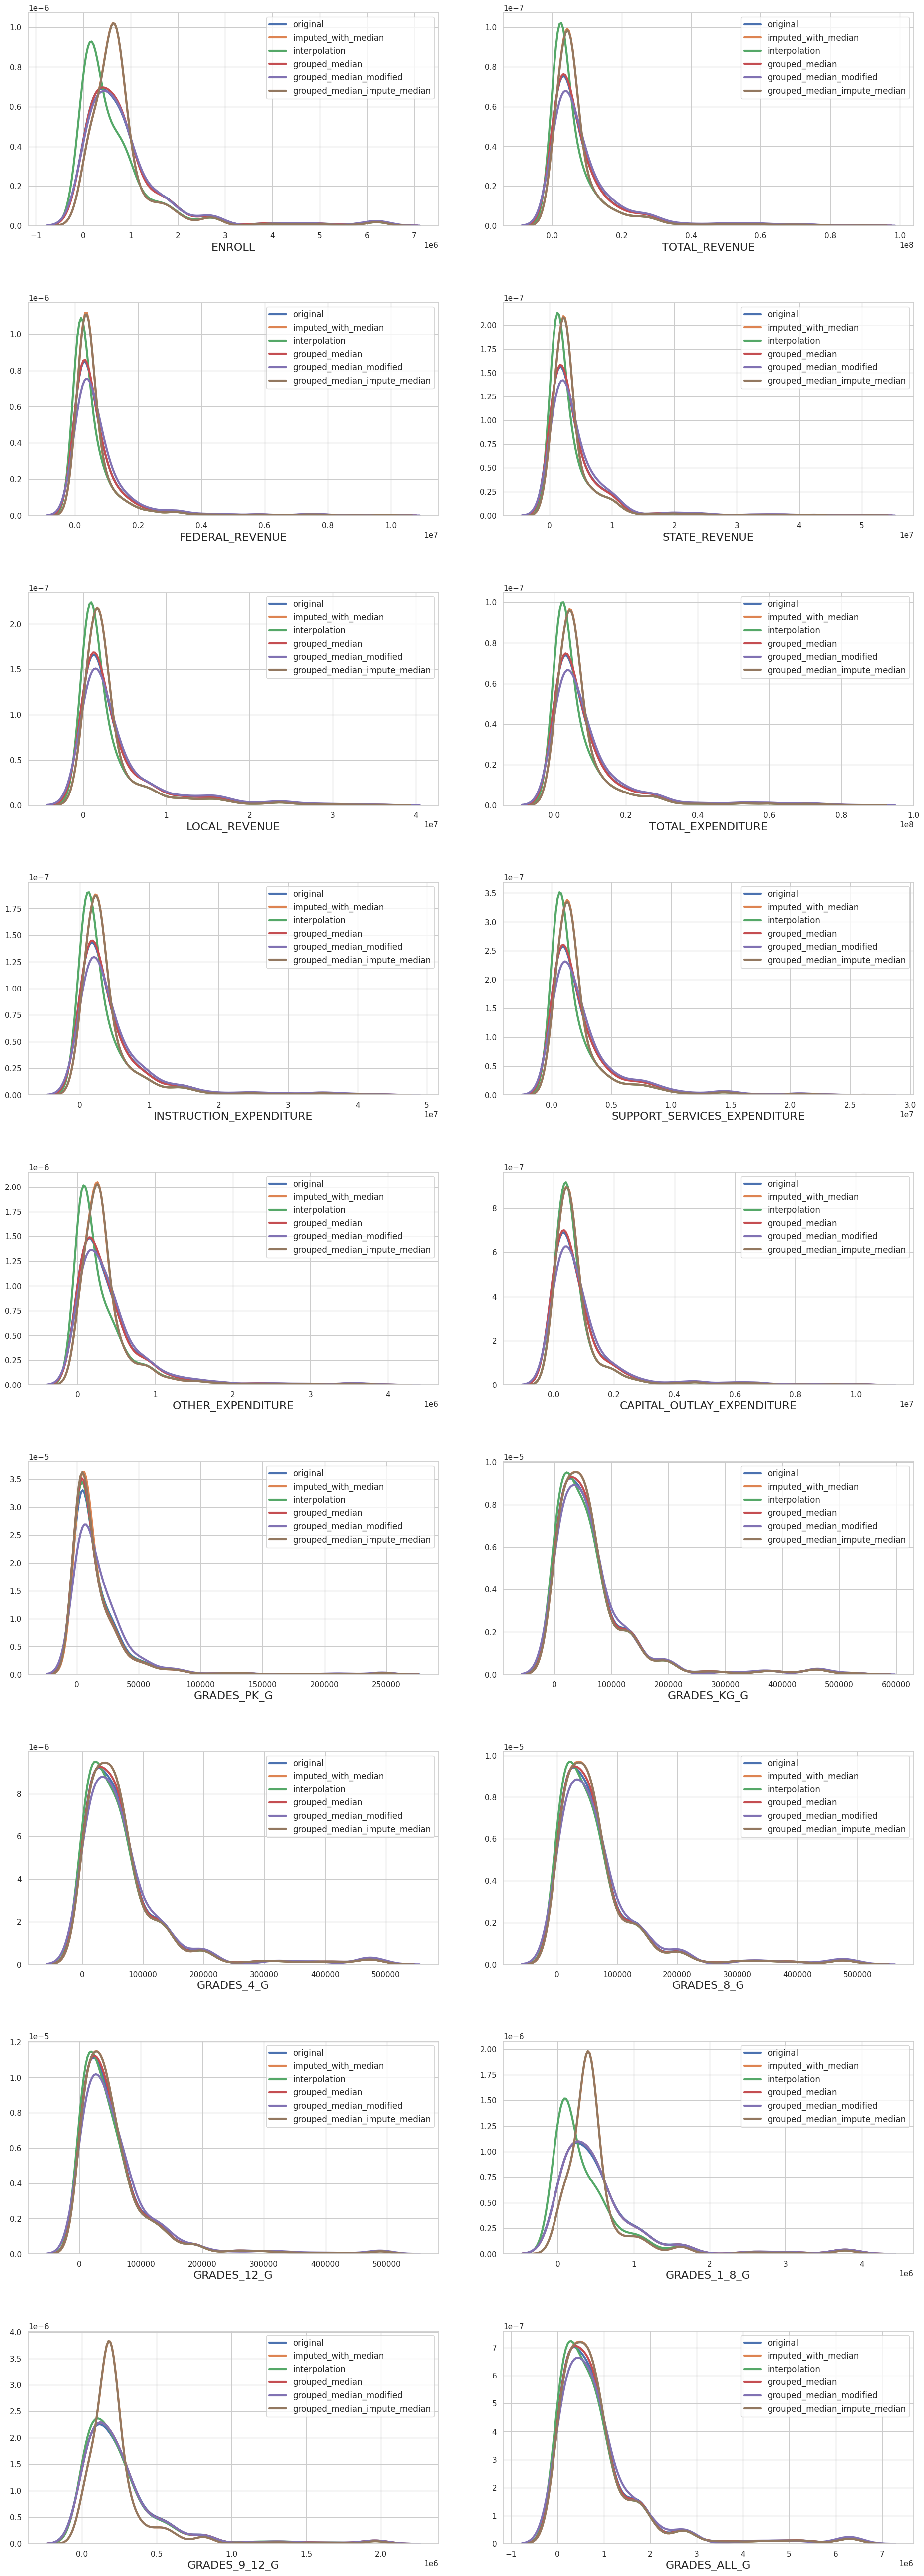

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

k=0
plt.figure(figsize=(20,70))

for col in df.columns:
  if col in df_datatype.index:
    k += 1
    plt.subplot(12,2,k)
    sns.kdeplot(df[col], label='original', linewidth=3)
    sns.kdeplot(df_impute_median[col], label='imputed_with_median', linewidth=3)
    sns.kdeplot(df_interpolate[col], label='interpolation', linewidth=3)
    sns.kdeplot(df_time_series[col], label='grouped_median', linewidth=3)
    sns.kdeplot(df_time_series_modified[col], label='grouped_median_modified', linewidth=3)
    sns.kdeplot(df_time_series_impute_median[col], label='grouped_median_impute_median', linewidth=3)
    plt.xlabel(col, fontsize=16)
    plt.ylabel('', fontsize=16)
    plt.legend(fontsize=12)

plt.tight_layout(pad=5.0)
plt.show()


#**4. OUTLIERS ASSIGNMENT**

In this assignment, you'll continue working with the U.S. Education Dataset from Kaggle. The data gives detailed state-level information on several facets of education on an annual basis. To learn more about the data and the column descriptions, you can view the Kaggle link above.

Don't forget to apply the most suitable missing-value-filling techniques from the previous checkpoint to the data. Provide the answers to the following only after you've addressed missing values!

To complete this assignment, submit a link to a Jupyter Notebook containing your solutions to the following tasks:

1. Consider the two variables: TOTAL_REVENUE and TOTAL_EXPENDITURE. Do these variables have outlier values?

2. If you detect outliers in the TOTAL_REVENUE and TOTAL_EXPENDITURE variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there are no outlier values after you handled them.

3. Create another variable by subtracting the original TOTAL_EXPENDITURE from TOTAL_REVENUE (before you eliminated the outliers). You can think of it as a kind of budget deficit in education. Do you find any outlier values in this new variable? If so, eliminate them using the technique that think is most suitable.

4. Now create another variable by subtracting the TOTAL_EXPENDITURE from TOTAL_REVENUE. This time, use the outlier eliminated versions of TOTAL_EXPENDITURE from TOTAL_REVENUE. In this newly created variable, can you find any outliers? If so, eliminate them.

5. Compare some basic descriptive statistics of the budget variables you end up with in the third and the fourth questions. Do you see any differences?

6. If your variable of interest is the budget deficit variable, which method do you think is the most appropriate in dealing with the outliers in this variable: the method in the third question or the one in the fourth question?

## **4.1 Consider the two variables: TOTAL_REVENUE and TOTAL_EXPENDITURE. Do these variables have outlier values?**

YES !

In [55]:
df_time_series_impute_median.isnull().sum()

PRIMARY_KEY                     0
STATE                           0
YEAR                            0
ENROLL                          0
TOTAL_REVENUE                   0
FEDERAL_REVENUE                 0
STATE_REVENUE                   0
LOCAL_REVENUE                   0
TOTAL_EXPENDITURE               0
INSTRUCTION_EXPENDITURE         0
SUPPORT_SERVICES_EXPENDITURE    0
OTHER_EXPENDITURE               0
CAPITAL_OUTLAY_EXPENDITURE      0
GRADES_PK_G                     0
GRADES_KG_G                     0
GRADES_4_G                      0
GRADES_8_G                      0
GRADES_12_G                     0
GRADES_1_8_G                    0
GRADES_9_12_G                   0
GRADES_ALL_G                    0
dtype: int64

In [56]:
df_time_series_impute_median.isnull().any().sum()

0

In [57]:
df_new = df_time_series_impute_median.copy(deep=True)
df_new.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G
0,1992_ALABAMA,ALABAMA,1992,653109.500000,2678885.000000,304177.000000,1659028.000000,715680.000000,2653798.000000,1481703.000000,735036.000000,274193.000000,174053.000000,8224.000000,55460.000000,57948.000000,58025.000000,41167.000000,403687.000000,186111.000000,731634.000000
1,1992_ALASKA,ALASKA,1992,653109.500000,1049591.000000,106780.000000,720711.000000,222100.000000,972488.000000,498362.000000,350902.000000,274193.000000,37451.000000,2371.000000,10152.000000,9748.000000,8789.000000,6714.000000,403687.000000,186111.000000,122487.000000
2,1992_ARIZONA,ARIZONA,1992,653109.500000,3258079.000000,297888.000000,1369815.000000,1590376.000000,3401580.000000,1435908.000000,1007732.000000,274193.000000,609114.000000,2544.000000,53497.000000,55433.000000,49081.000000,37410.000000,403687.000000,186111.000000,673477.000000
3,1992_ARKANSAS,ARKANSAS,1992,653109.500000,1711959.000000,178571.000000,958785.000000,574603.000000,1743022.000000,964323.000000,483488.000000,274193.000000,145212.000000,808.000000,33511.000000,34632.000000,36011.000000,27651.000000,403687.000000,186111.000000,441490.000000
4,1992_CALIFORNIA,CALIFORNIA,1992,653109.500000,26260025.000000,2072470.000000,16546514.000000,7641041.000000,27138832.000000,14358922.000000,8520926.000000,274193.000000,2044688.000000,59067.000000,431763.000000,418418.000000,363296.000000,270675.000000,403687.000000,186111.000000,5254844.000000


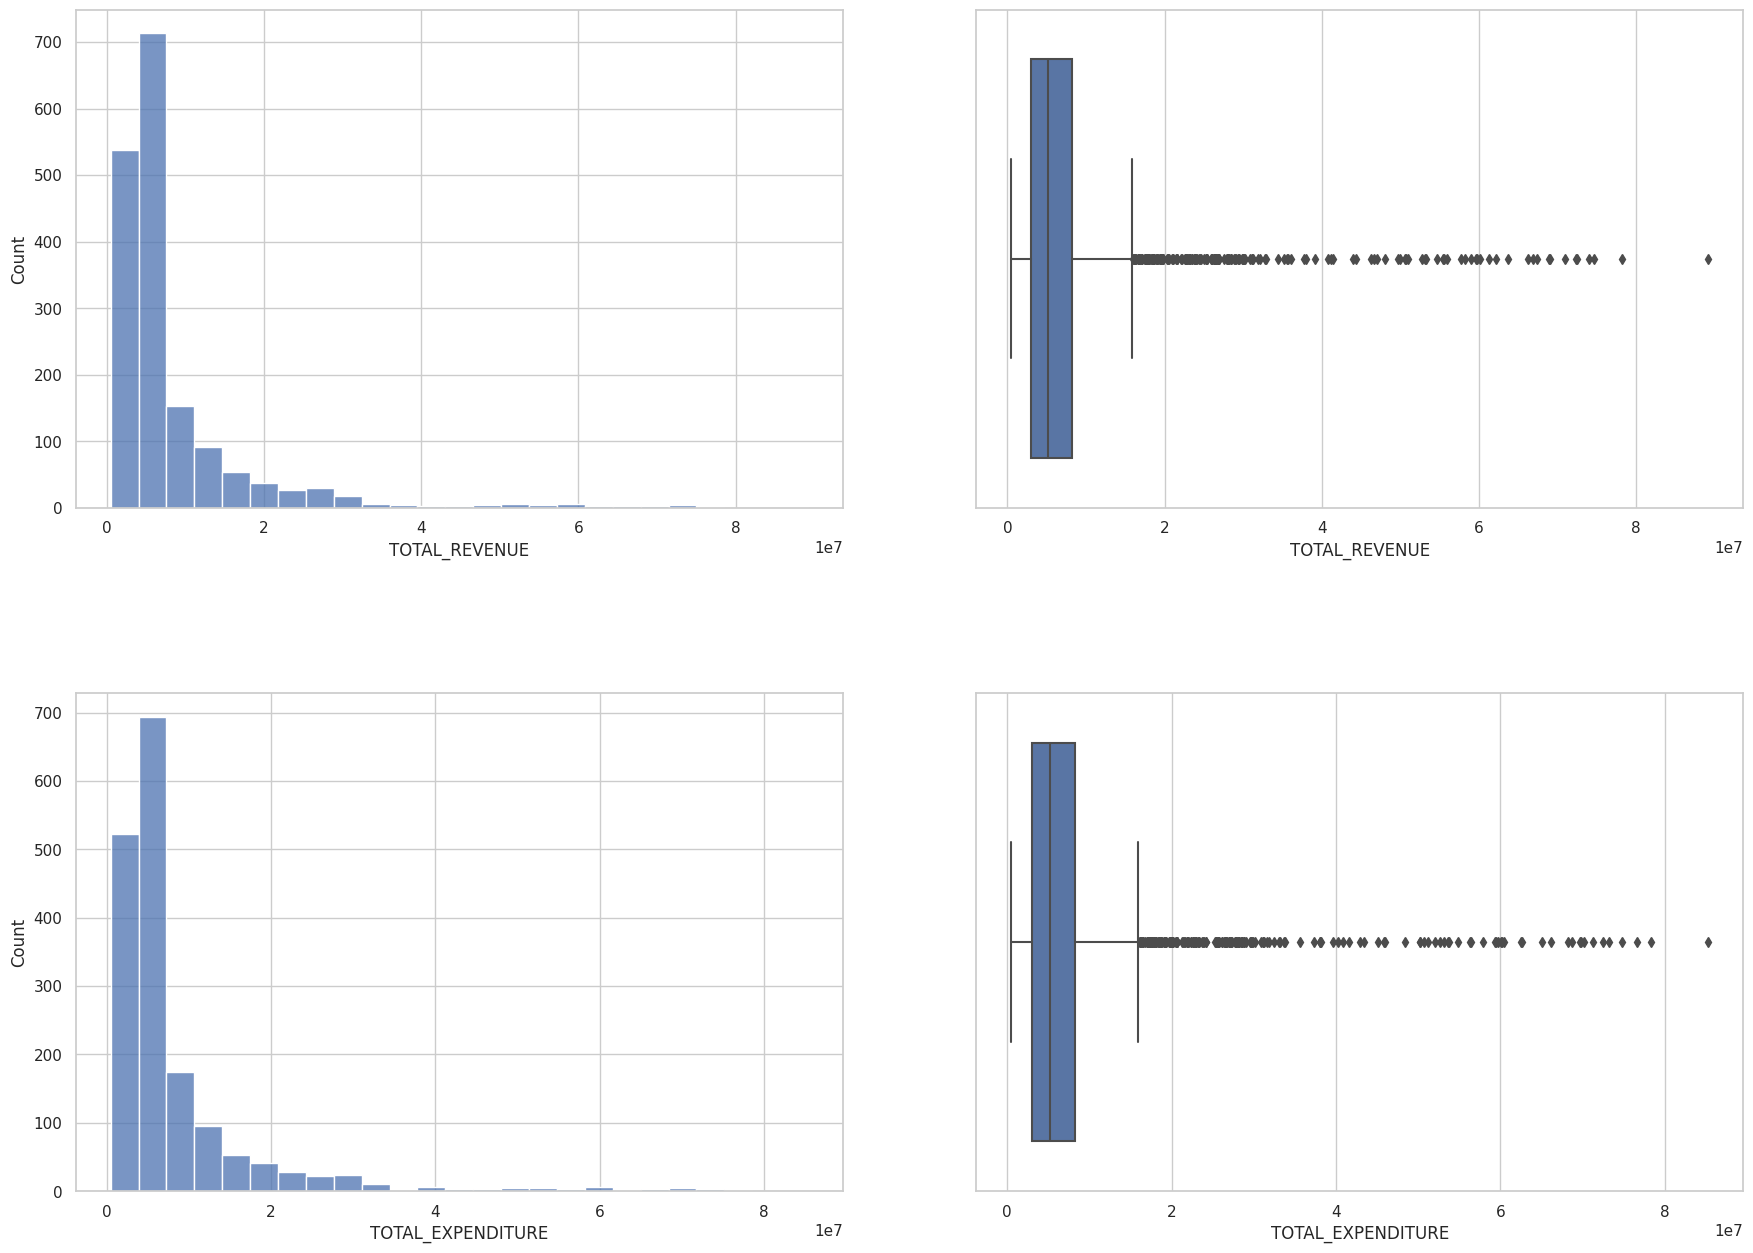

In [58]:
#method 1: visualizing data distribution
fig, ax=plt.subplots(2,2,figsize=(20,15))
#np.ravel(ax)[1]
sns.histplot(df_new['TOTAL_REVENUE'], ax=ax[0,0], bins=25)
#using whis upper bound and lower bound can be adjusted.
sns.boxplot(data=df_new, x='TOTAL_REVENUE', ax=ax[0,1], whis=1.5)

sns.histplot(df_new['TOTAL_EXPENDITURE'], ax=ax[1,0], bins=25)
sns.boxplot(data=df_new, x='TOTAL_EXPENDITURE', ax=ax[1,1], whis=1.5)

plt.tight_layout(pad=8.0)
plt.show()

In [59]:
df_new['TOTAL_EXPENDITURE'].value_counts(bins=25, normalize=True)

(3875203.72, 7268742.44]     0.404665
(396826.531, 3875203.72]     0.304373
(7268742.44, 10662281.16]    0.102041
(10662281.16, 14055819.88]   0.055977
(14055819.88, 17449358.6]    0.030904
(17449358.6, 20842897.32]    0.023907
(20842897.32, 24236436.04]   0.016327
(27629974.76, 31023513.48]   0.013994
(24236436.04, 27629974.76]   0.012828
(31023513.48, 34417052.2]    0.005831
(37810590.92, 41204129.64]   0.003499
(58171823.24, 61565361.96]   0.003499
(68352439.4, 71745978.12]    0.002915
(47991207.08, 51384745.8]    0.002915
(51384745.8, 54778284.52]    0.002915
(54778284.52, 58171823.24]   0.002332
(71745978.12, 75139516.84]   0.001749
(64958900.68, 68352439.4]    0.001749
(41204129.64, 44597668.36]   0.001749
(44597668.36, 47991207.08]   0.001749
(61565361.96, 64958900.68]   0.001166
(34417052.2, 37810590.92]    0.001166
(75139516.84, 78533055.56]   0.001166
(81926594.28, 85320133.0]    0.000583
(78533055.56, 81926594.28]   0.000000
Name: TOTAL_EXPENDITURE, dtype: float64

In [60]:
df_new['TOTAL_REVENUE'].value_counts(bins=25, normalize=True)

(4015714.48, 7565778.96]     0.415743
(376898.387, 4015714.48]     0.313703
(7565778.96, 11115843.44]    0.089213
(11115843.44, 14665907.92]   0.053644
(14665907.92, 18215972.4]    0.031487
(18215972.4, 21766036.88]    0.022157
(25316101.36, 28866165.84]   0.017493
(21766036.88, 25316101.36]   0.015743
(28866165.84, 32416230.32]   0.010496
(57266681.68, 60816746.16]   0.003499
(50166552.72, 53716617.2]    0.003499
(32416230.32, 35966294.8]    0.003499
(46616488.24, 50166552.72]   0.002915
(71466939.6, 75017004.08]    0.002332
(35966294.8, 39516359.28]    0.002332
(53716617.2, 57266681.68]    0.002332
(64366810.64, 67916875.12]   0.001749
(67916875.12, 71466939.6]    0.001749
(43066423.76, 46616488.24]   0.001749
(60816746.16, 64366810.64]   0.001749
(39516359.28, 43066423.76]   0.001749
(75017004.08, 78567068.56]   0.000583
(85667197.52, 89217262.0]    0.000583
(78567068.56, 82117133.04]   0.000000
(82117133.04, 85667197.52]   0.000000
Name: TOTAL_REVENUE, dtype: float64

In [61]:
df_new[['TOTAL_REVENUE', 'TOTAL_EXPENDITURE']].describe()

,TOTAL_REVENUE,TOTAL_EXPENDITURE
count,1715.000000,1715.000000
mean,8087447.938776,8194427.290379
std,10286721.028648,10484181.282895
min,465650.000000,481665.000000
25%,2984292.000000,2995256.000000
50%,5128559.000000,5245560.000000
75%,8165744.000000,8220253.000000
max,89217262.000000,85320133.000000


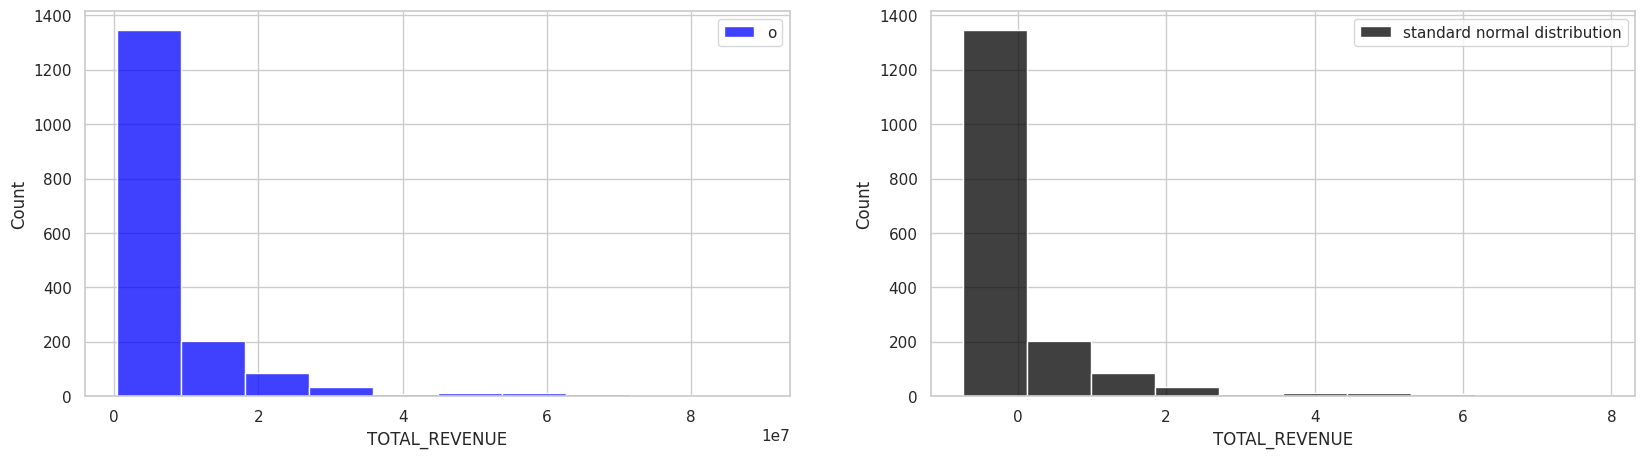

In [62]:
#good symmetric distribution since it is calculated based on the distance from mean
from scipy.stats import zscore

z_score = zscore(df_new['TOTAL_REVENUE'])

fig, ax = plt.subplots(1,2,figsize=(20,5))

#plot Total_Revenue
sns.histplot(df_new['TOTAL_REVENUE'], color='blue', ax=ax[0], label = 'original distribution', bins=10)
ax[0].legend('original distribution')

#plot zscore of Total_Revenue
sns.histplot(z_score, color='black', ax = ax[1], label='standard normal distribution', bins=10)
ax[1].legend('standard normal distribution')


plt.legend()
plt.show()

In [63]:
for i in range(1,5):
  print('The score threshold is: {}'.format(i))
  print('The indices of outliers:')
  #print('np.where(z_score > i')
  print('Number of outliers is: {}'.format(len((np.where(z_score>i)[0]))))
  print(('-'*30))

The score threshold is: 1
The indices of outliers:
Number of outliers is: 164
------------------------------
The score threshold is: 2
The indices of outliers:
Number of outliers is: 70
------------------------------
The score threshold is: 3
The indices of outliers:
Number of outliers is: 43
------------------------------
The score threshold is: 4
The indices of outliers:
Number of outliers is: 33
------------------------------


In [64]:
# good for skewed data since it is calculated based on median
iqr = np.quantile(df_new['TOTAL_REVENUE'], 0.75) - np.quantile(df_new['TOTAL_REVENUE'], 0.25)
upper_bound = np.quantile(df_new['TOTAL_REVENUE'], 0.75) + 1.5 * iqr
lower_bound = np.quantile(df_new['TOTAL_REVENUE'], 0.25) + 1.5 * iqr

df_new[(df_new['TOTAL_REVENUE']>upper_bound) & (df_new['TOTAL_REVENUE']<lower_bound)]['TOTAL_REVENUE']

print(upper_bound < df_new['TOTAL_REVENUE'].max())

True


In [65]:
df_new['TOTAL_REVENUE'].describe()

count       1715.000000
mean     8087447.938776
std     10286721.028648
min       465650.000000
25%      2984292.000000
50%      5128559.000000
75%      8165744.000000
max     89217262.000000
Name: TOTAL_REVENUE, dtype: float64

## **4.2. If you detect outliers in the TOTAL_REVENUE and TOTAL_EXPENDITURE variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there are no outlier values after you handled them.**

winsorize(a, limits=[limits[0], limits[1]])

winsorize set the lowest values to limits[0] th percentile, set the highest values to the (1 - limits[1] th percentile

In [66]:
from scipy.stats.mstats import winsorize

#replacing the 15% of the highest values
TOTAL_REVENUE_winsorization = winsorize(np.array(df_new['TOTAL_REVENUE']), (0, 0.15))
TOTAL_EXPENDITURE_winsorization = winsorize(np.array(df_new['TOTAL_EXPENDITURE'].dropna()), (0, 0.15))
pd.Series(TOTAL_REVENUE_winsorization).describe()

count       1715.000000
mean     5991200.923032
std      3873008.958258
min       465650.000000
25%      2984292.000000
50%      5128559.000000
75%      8165744.000000
max     12999357.000000
dtype: float64

In [67]:
df_winsorize_comparison = pd.concat([df_new['TOTAL_REVENUE'].describe(),
              pd.Series(TOTAL_REVENUE_winsorization).describe()], axis=1)
df_winsorize_comparison.columns = ['TOTAL_REVENUE', 'TOTAL REVENUE vinsorized']

df_winsorize_comparison

,TOTAL_REVENUE,TOTAL REVENUE vinsorized
count,1715.000000,1715.000000
mean,8087447.938776,5991200.923032
std,10286721.028648,3873008.958258
min,465650.000000,465650.000000
25%,2984292.000000,2984292.000000
50%,5128559.000000,5128559.000000
75%,8165744.000000,8165744.000000
max,89217262.000000,12999357.000000


The mean changes because it is sensitive to outliers but median and other percentiles do not change

In [68]:
df_winsorize_comparison = pd.concat([df_new['TOTAL_EXPENDITURE'].describe(),
                pd.Series(TOTAL_EXPENDITURE_winsorization).describe()], axis=1)

df_winsorize_comparison.columns = ['TOTAL_EXPENDITURE', 'TOTAL EXPRNDITURE winsorized']

df_winsorize_comparison

,TOTAL_EXPENDITURE,TOTAL EXPRNDITURE winsorized
count,1715.000000,1715.000000
mean,8194427.290379,6005415.872886
std,10484181.282895,3806786.397503
min,481665.000000,481665.000000
25%,2995256.000000,2995256.000000
50%,5245560.000000,5245560.000000
75%,8220253.000000,8220253.000000
max,85320133.000000,12794086.000000


Note that central tendency mean has changed significantly

<Axes: >

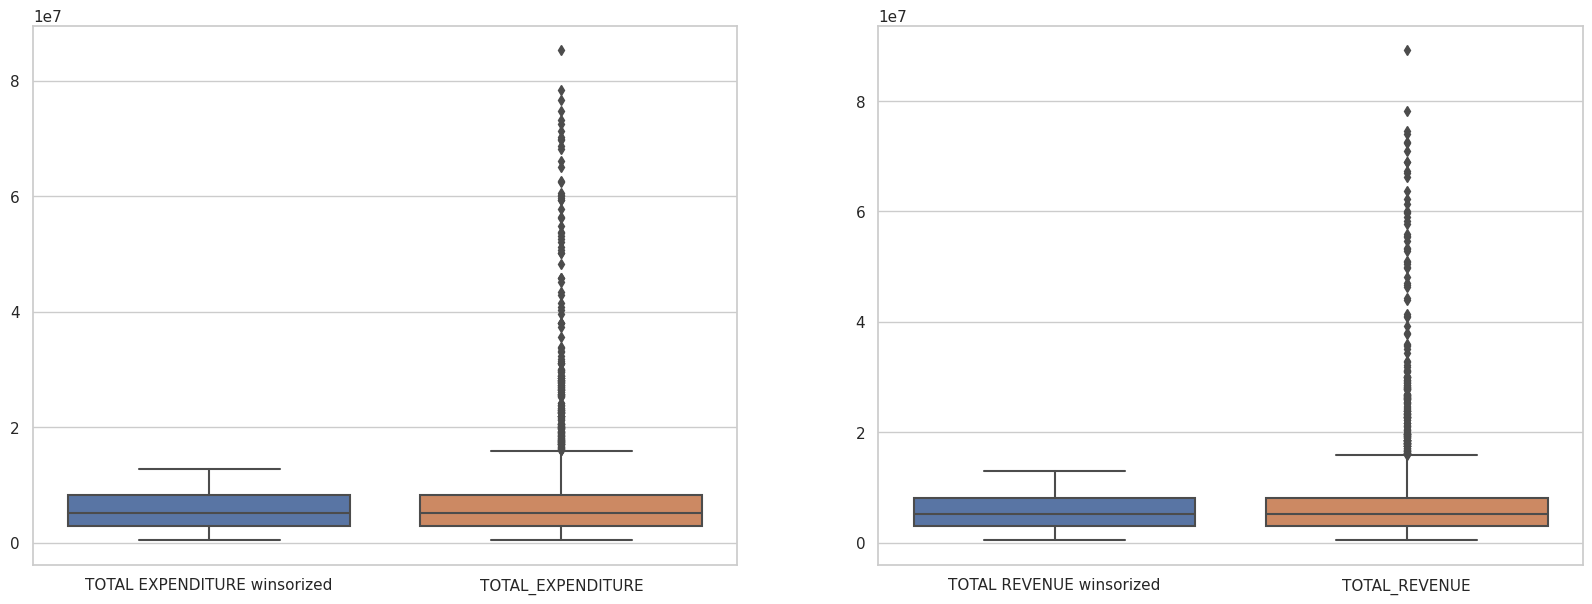

In [69]:
fig, ax = plt.subplots(1,2, figsize=(20,7))

data_EXPENDITURE = pd.concat([pd.Series(TOTAL_EXPENDITURE_winsorization),
                              df_new['TOTAL_EXPENDITURE']], axis=1)
data_EXPENDITURE.columns = ['TOTAL EXPENDITURE winsorized', 'TOTAL_EXPENDITURE']

sns.boxplot(data = data_EXPENDITURE, ax=ax[0])

#####################

data_REVENUE = pd.concat([pd.Series(TOTAL_REVENUE_winsorization),
                              df_new['TOTAL_REVENUE']], axis=1)
data_REVENUE.columns = ['TOTAL REVENUE winsorized', 'TOTAL_REVENUE']

sns.boxplot(data = data_REVENUE, ax=ax[1])



A logaritmic scales are useful when the data you are displaying is much less or much more than the rest of the data or when the percentage differences between values are important. A logarithmic price scale uses the percentage to plot data points, so, the scale prices are not positioned eqidistantly. A linear price scale uses an equal value between price scales providing an equal distance between values. A logaritmic scale is nonlinear scale often used when analyzing a large range of quantities. Instead of increasing in equal increment, each interval is increased by a factor of the logarithm. Typically, a base ten and base a scale are used.

Log transformation also de-emphasizes outliers and allows us to potentially obtain a bell-shaped distribution. The idea is that taking the log of the data can restore symmetry to the data. A log transformation is not always essential to analyzing the data. It can depend on the statistical analysis we are performing.

In [70]:
#Example

[1,2,3,4]

print(np.log(1) - np.log(3) == np.log(1/3))
print('1-2 = ', 1-2)
print(np.log(1) - np.log(2))
print(np.log(2) - np.log(3))
print(np.log(3) - np.log(4))
print(np.log(4) - np.log(5))

print('10-100 = ', 10-100)
print(np.log(10) - np.log(100))
print(np.log(100) - np.log(1000))
print(np.log(1000) - np.log(10000))
print(np.log(10000) - np.log(100000))

True
1-2 =  -1
-0.6931471805599453
-0.4054651081081645
-0.2876820724517808
-0.2231435513142097
10-100 =  -90
-2.302585092994046
-2.302585092994045
-2.302585092994047
-2.302585092994045


Let's transform them by log transformation to narrow the range of values so that the impact of outliers on the entire data decreases

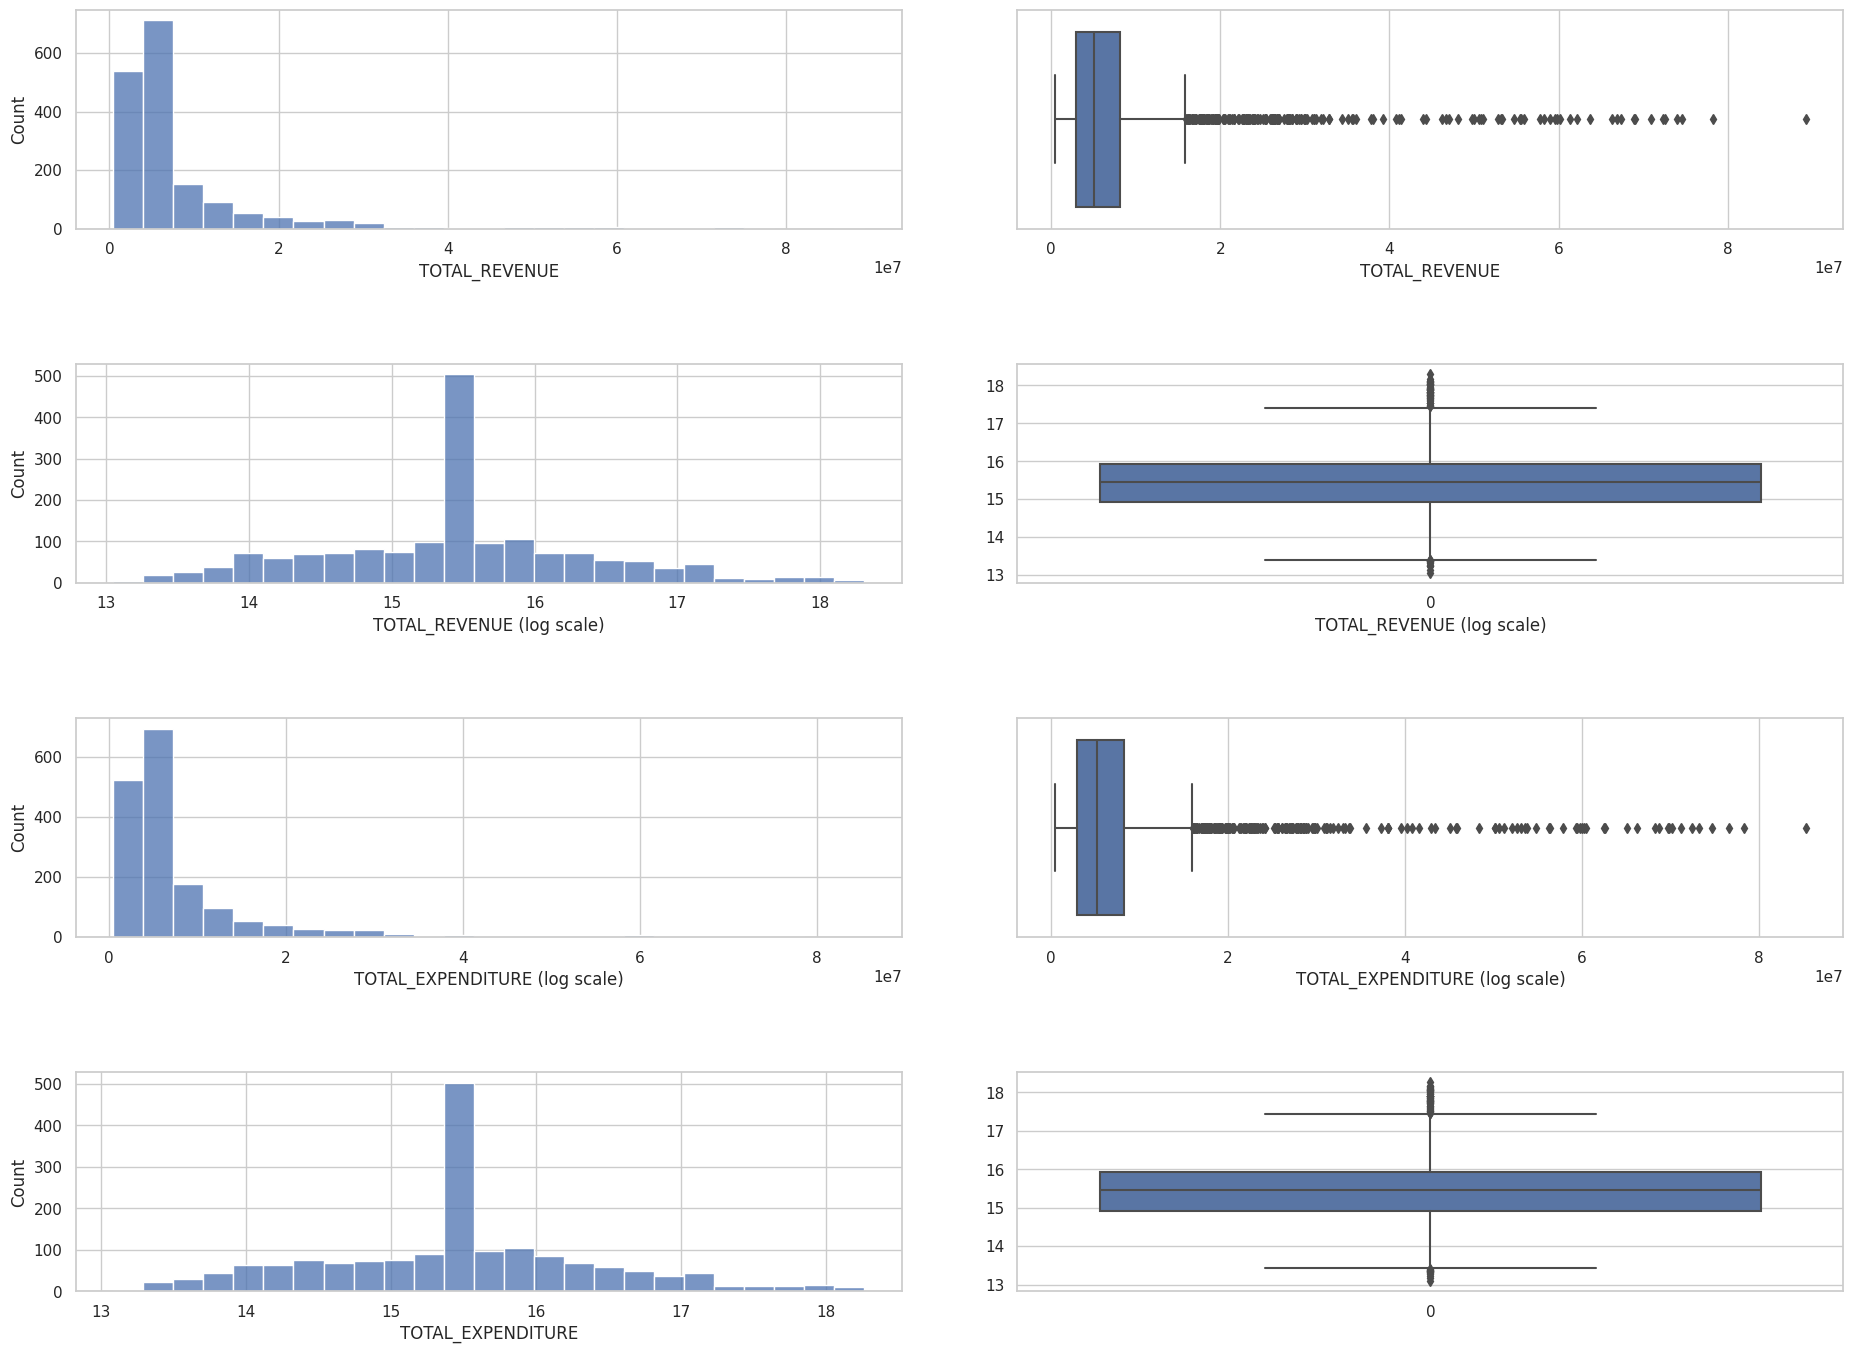

In [71]:
fig, ax = plt.subplots(4,2, figsize=(20,15))

sns.histplot(df_new['TOTAL_REVENUE'], ax=ax[0,0], bins=25)
sns.boxplot(data=df_new, x='TOTAL_REVENUE', ax=ax[0,1], whis=1.5)

sns.histplot(np.log(df_new['TOTAL_REVENUE']), ax=ax[1,0], bins=25)
ax[1,0].set_xlabel('TOTAL_REVENUE (log scale)')

sns.boxplot(np.log(df_new['TOTAL_REVENUE']), ax=ax[1,1], whis=1.5)
ax[1,1].set_xlabel('TOTAL_REVENUE (log scale)')

#############
sns.histplot(df_new['TOTAL_EXPENDITURE'], ax=ax[2,0], bins=25)
sns.boxplot(data=df_new, x='TOTAL_EXPENDITURE', ax=ax[2,1], whis=1.5)

sns.histplot(np.log(df_new['TOTAL_EXPENDITURE']), ax=ax[3,0], bins=25)
ax[2,0].set_xlabel('TOTAL_EXPENDITURE (log scale)')
sns.boxplot(np.log(df_new['TOTAL_EXPENDITURE']), ax=ax[3,1], whis=1.5)
ax[2,1].set_xlabel('TOTAL_EXPENDITURE (log scale)')

plt.tight_layout(pad=5.0)
plt.show()

In [72]:
p25_log, p75_log = np.percentile(np.log(df_new['TOTAL_REVENUE']), [25,75])
p25, p75 = np.percentile(df_new['TOTAL_REVENUE'], [25,75])

IQR = p75 - p25
IQR_log = p75_log - p25_log

log_threshold_values=[]

for threshold_value in np.arange(1,5,0.5):
  min_value_log = p25_log - (IQR_log*threshold_value)
  max_value_log = p75_log + (IQR_log*threshold_value)
  min_value = p25 - (IQR*threshold_value)
  max_value = p75 + (IQR*threshold_value)

  outlier_value_number_log = len(np.where((np.log(df_new['TOTAL_REVENUE']) > max_value_log)|
                                    (np.log(df_new['TOTAL_REVENUE']) < min_value_log))[0])
  
  outlier_value_number = len(np.where((df_new['TOTAL_REVENUE'] > max_value)|
                                      (df_new['TOTAL_REVENUE'] < min_value))[0])
  
  log_threshold_values.append({'threshold_value': threshold_value,
                              'outlier_value_number': outlier_value_number,
                              'outlier_value_number_log': outlier_value_number_log})
  
df_outliers = pd.DataFrame(log_threshold_values)
df_outliers

,threshold_value,outlier_value_number,outlier_value_number_log
0,1.000000,246,217
1,1.500000,195,57
2,2.000000,161,15
3,2.500000,131,0
4,3.000000,111,0
5,3.500000,90,0
6,4.000000,70,0
7,4.500000,54,0


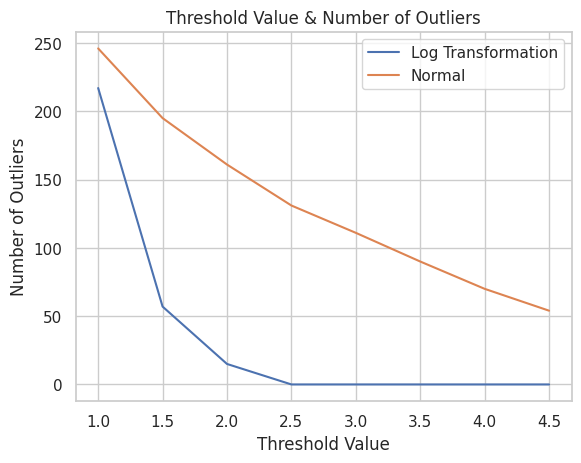

In [73]:
df_outliers.plot(x='threshold_value', y=['outlier_value_number_log', 'outlier_value_number'])
plt.title('Threshold Value & Number of Outliers')
plt.xlabel('Threshold Value')
plt.ylabel('Number of Outliers')
plt.legend(('Log Transformation', 'Normal'))
plt.show()

## **4.3. Create another variable by subtracting the original TOTAL_EXPENDITURE from TOTAL_REVENUE (before you eliminated the outliers). You can think of it as a kind of budget deficit in education. Do you find any outlier values in this new variable? If so, eliminate them using the technique that think is most suitable.**

Create another variable by substracting the original TOTAL_EXPENDITURE from TOTAL_REVENUE (befor you eliminated the outliers). You can think of it as a kind of budget deficit in education. Do you find outlier values in this new variable. If so, eliminate them using the technique that think is most suitable.

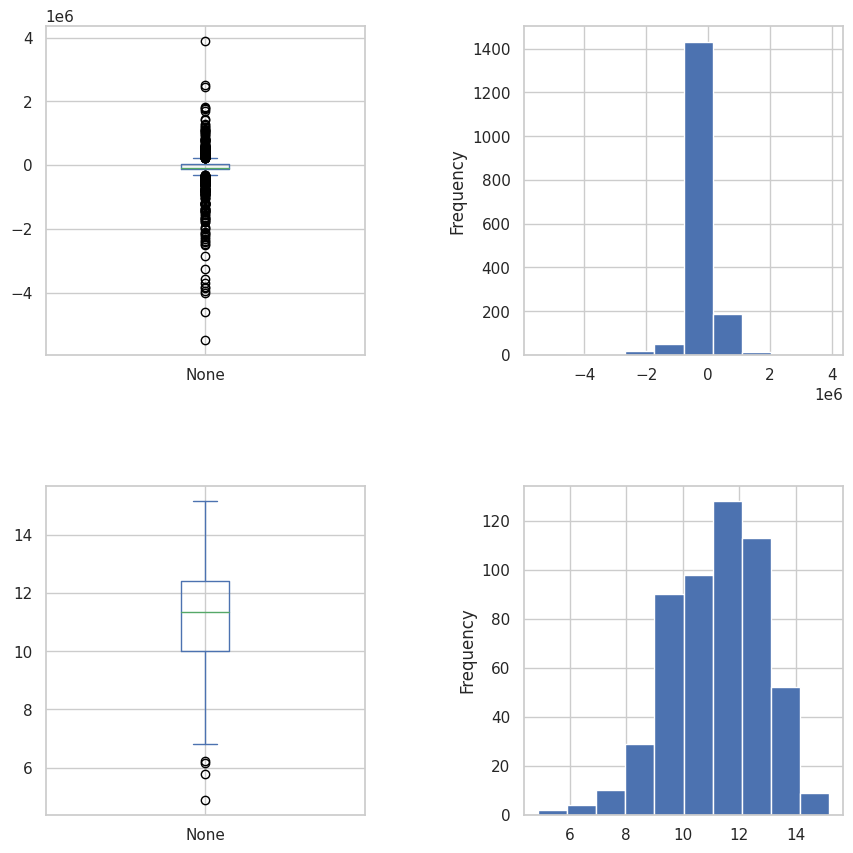

In [74]:
fig, ax = plt.subplots(2,2)

deficit_df = df_new['TOTAL_REVENUE'] - df_new['TOTAL_EXPENDITURE']
deficit_df.plot(kind = 'box', figsize=(10,10), ax=ax[0,0])
deficit_df.plot(kind = 'hist', figsize=(10,10), ax=ax[0,1])

deficit_df_logscale = np.log(df_new['TOTAL_REVENUE'] - df_new['TOTAL_EXPENDITURE'])
deficit_df_logscale.plot(kind = 'box', figsize=(10,10), ax=ax[1,0])
deficit_df_logscale.plot(kind = 'hist', figsize=(10,10), ax=ax[1,1])

plt.tight_layout(pad=5.0)
plt.show()

## **4.4. Now create another variable by subtracting the TOTAL_EXPENDITURE from TOTAL_REVENUE. This time, use the outlier eliminated versions of TOTAL_EXPENDITURE from TOTAL_REVENUE. In this newly created variable, can you find any outliers? If so, eliminate them.**

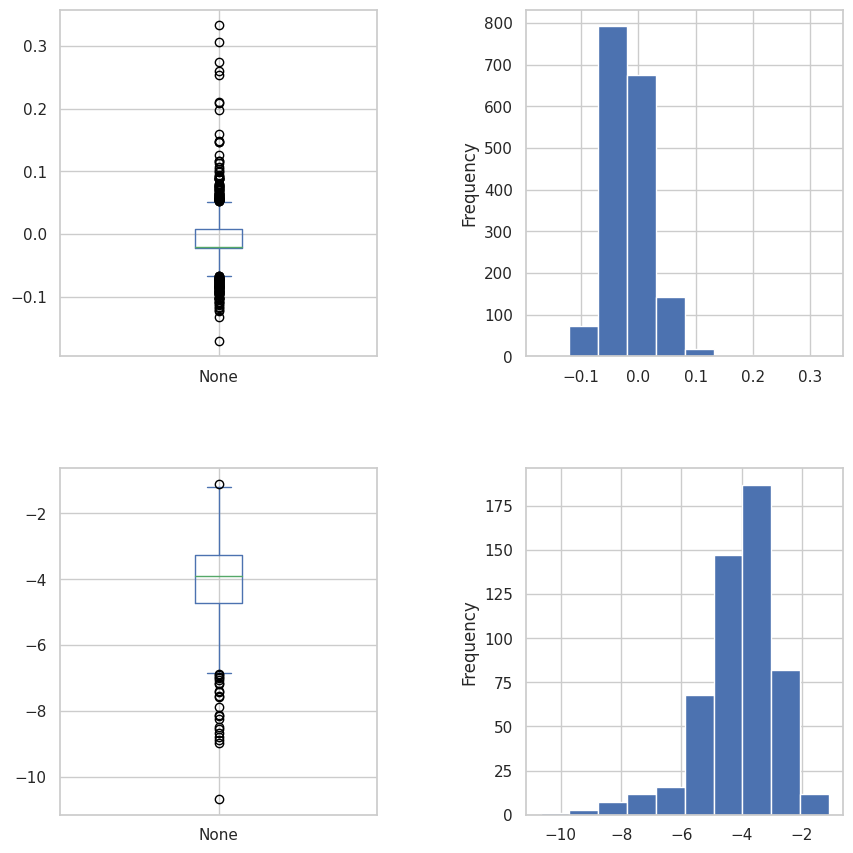

In [75]:
fig, ax = plt.subplots(2,2)


deficit_df_log_individual = np.log(df_new['TOTAL_REVENUE']) - np.log(df_new['TOTAL_EXPENDITURE'])

deficit_df_log_individual.plot(kind='box', figsize=(10,10), ax=ax[0,0])
deficit_df_log_individual.plot(kind='hist', figsize=(10,10), ax=ax[0,1])



deficit_df_individual_log = np.log(np.log(df_new['TOTAL_REVENUE']) - np.log(df_new['TOTAL_EXPENDITURE']))

deficit_df_individual_log.plot(kind='box', figsize=(10,10), ax=ax[1,0])
deficit_df_individual_log.plot(kind='hist', figsize=(10,10), ax=ax[1,1])

plt.tight_layout(pad=5.0)
plt.show()

count the number of outliers in all above cases
with IQR method

## **4.5. Compare some basic descriptive statistics of the budget variables you end up with in the third and the fourth questions. Do you see any differences?**

In [76]:
outlier_comparison_df = pd.concat([deficit_df.describe().describe(),
                                   deficit_df_logscale.describe(),
                                   deficit_df_log_individual.describe(),
                                   deficit_df_log_individual.describe().describe()],
                                   axis=1)

outlier_comparison_df.columns = ['original', 'log_scale', 'original_log', 'original_log_logscale']

outlier_comparison_df

,original,log_scale,original_log,original_log_logscale
count,8.000000,535.000000,1715.000000,8.000000
mean,-174493.203725,11.211199,-0.010003,214.394431
std,2545030.054870,1.627637,0.038865,606.336230
min,-5487742.000000,4.890349,-0.170369,-0.170369
25%,-109484.763703,10.022261,-0.022557,-0.020833
50%,-47901.000000,11.333356,-0.020258,-0.001432
75%,137889.930451,12.399039,0.007139,0.112306
max,3897129.000000,15.175751,0.332627,1715.000000


If your variable of interest is the budget deficit variable, which method do you think is the most appropriate in dealing with the outliers in this variable: the method in the third question or the one in fourth question?

## **winsorize is prefered because there are too many outliers**

Logging can be a useful tool for dealing with outliers in data. A log transformation can help to reduce the impact of extreme values, making it easier to visualize and analyze the data. Here are some situations when you might want to consider using a log transformation to deal with outliers:

**When the data is heavily skewed:**

If your data is highly skewed, with a long tail on one end of the distribution, a log transformation can help to make the data more symmetric.

**When the data has a wide range:**

If the data has a wide range of values, with some extreme values that are much larger or smaller than the rest, a long transformation can help to compress the range and make it easier to compare different values.

**When the data is non-normal:**

If the data is not normally distributed, a log transformation can help to make it more normal. It is important to note that log transformations are not always appropriate for dealing with outliers. In some cases, other techniques such as winsorization or outlier removal may be more appropriate. It is also important to consider the goals of the analysis and the specific characteristics of the data before deciding whether or not to use a log transformation.

Winsorizing is a technique for dealing with outliers in data by limiting the extreme values to a specified threshold. Here are some situations when you might want to consider using winsorizing to deal with outliers:

**When the outliers are due to measurement error:**

If the outliers are due to measurement error, rather than representing actual extreme values in the data, winsorizing can help to reduce the impact of these errors.

**When the outliers are extreme but valid:**

If the outliers are valid values, but are so extreme that they are distorting the overall pattern of the data, winsorizing can help to bring them in line with the rest of the data.

**When the data is non-normal:**

If the data is not normally distributed, winsorizing can help to bring the distribution closer to normal. It is important to note that winsorizing can also have drawbacks, as it can result in a loss of information and potentially distort the true distribution of the data. It is important to carefully consider the goals of the analysis and the specific characteristics of the data before deciding whether or not to use winsorizing as a technique for dealing with outliers.

When dealing with a large number of outliers, it is generally more appropriate to use a winsorizing technique rather than a log transformation. Winsorizing involves replacing extreme valeus with values at a specified percentile, which can help to reduce the influence of outliers while preserving the original distribution of the data.

However, it is important to keep in mind that the best approach will depend on the specific nature of the data and the goals of the analysis. It may be necessary to try both techniques and compare the results to determine which approach is most appropriate for a given dataset.

# **5. UNIVARIATE ANALYSIS**

In this assignment, you'll continue working with the U.S. Education Dataset from Kaggle. The data gives detailed, state-level information on the several facets of the state of education on an annual basis. To learn more about the data and the column descriptions, you can view the Kaggle link above.

Don't forget to apply the most suitable missing-value-filling techniques you applied in the previous checkpoint to the data. You're supposed to provide your answers to the following questions (1-4) after you handle the missing values.

To complete this assignment, submit a link to a Jupyter Notebook containing your solutions to the following tasks:

Answer the following questions as you work through this assignment, and then submit a link to your Notebook.

1. Derive the descriptive statistics of the data and discuss the points you find remarkable.
2. Choose a state (such as California) and draw a line graph of its total revenues and total expenditures over the years. How do these two variables evolve during these years? Try to explain the peaks and troughs with some state-wise news and information around those dates.
3. In your chosen state, in which of the lessons are the students more successful—math or reading?
4. What are the distributions of the math and reading scores in the sample?
5. Now, look again at the original dataset (before you filled in the missing values). Notice there are too many missing values for math and reading scores. Fill out the missing values using mean, median, and linear interpolation. Then, compare the effects of these techniques on the distributions of the score variables.


## **5.1. Descriptive statistics of the data**

### **5.1.1. Importing Libraries & Dataset**

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import seaborn as sns

In [78]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [79]:
#df_states=pd.read_csv('/Users/arifaygun/Documents/GitHub/Data Sets/Magnimind/states_all.csv')
import pandas as pd
import os

def file_locator(file_name):
  main_dir = os.getcwd()

  for dir, folder, files in os.walk(main_dir):
    for file in files:
      if file == file_name:
        file_path = os.path.join(dir,file)
  return file_path

file_path = file_locator('states_all.csv')
df_states = pd.read_csv(file_path)
df_states.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.000000,304177.000000,1659028.000000,715680.000000,2653798.000000,1481703.000000,735036.000000,NaN,174053.000000,8224.000000,55460.000000,57948.000000,58025.000000,41167.000000,NaN,NaN,731634.000000,208.000000,252.000000,207.000000,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.000000,106780.000000,720711.000000,222100.000000,972488.000000,498362.000000,350902.000000,NaN,37451.000000,2371.000000,10152.000000,9748.000000,8789.000000,6714.000000,NaN,NaN,122487.000000,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.000000,297888.000000,1369815.000000,1590376.000000,3401580.000000,1435908.000000,1007732.000000,NaN,609114.000000,2544.000000,53497.000000,55433.000000,49081.000000,37410.000000,NaN,NaN,673477.000000,215.000000,265.000000,209.000000,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.000000,178571.000000,958785.000000,574603.000000,1743022.000000,964323.000000,483488.000000,NaN,145212.000000,808.000000,33511.000000,34632.000000,36011.000000,27651.000000,NaN,NaN,441490.000000,210.000000,256.000000,211.000000,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.000000,2072470.000000,16546514.000000,7641041.000000,27138832.000000,14358922.000000,8520926.000000,NaN,2044688.000000,59067.000000,431763.000000,418418.000000,363296.000000,270675.000000,NaN,NaN,5254844.000000,208.000000,261.000000,202.000000,NaN


### **5.1.2. Data Preparation**

In [80]:
df_states.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715 entries, 0 to 1714
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   1715 non-null   object 
 1   STATE                         1715 non-null   object 
 2   YEAR                          1715 non-null   int64  
 3   ENROLL                        1224 non-null   float64
 4   TOTAL_REVENUE                 1275 non-null   float64
 5   FEDERAL_REVENUE               1275 non-null   float64
 6   STATE_REVENUE                 1275 non-null   float64
 7   LOCAL_REVENUE                 1275 non-null   float64
 8   TOTAL_EXPENDITURE             1275 non-null   float64
 9   INSTRUCTION_EXPENDITURE       1275 non-null   float64
 10  SUPPORT_SERVICES_EXPENDITURE  1275 non-null   float64
 11  OTHER_EXPENDITURE             1224 non-null   float64
 12  CAPITAL_OUTLAY_EXPENDITURE    1275 non-null   float64
 13  GRA

In [81]:
df_time_series_impute_median.describe() # only numerical column statistical description
df_time_series_impute_median.describe(include='all') #  numerical and categorical columns statistical description

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G
count,1715,1715,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000
unique,1715,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1992_ALABAMA,ALABAMA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2002.075219,841736.861516,8087447.938776,676690.653644,3793996.117201,3583355.878134,8194427.290379,4229368.636735,2389240.046647,385804.789504,802191.352187,16579.561808,67830.273469,68201.404082,67179.019825,57508.918367,507300.172012,246035.151020,901489.724198
std,NaN,NaN,9.568621,908828.634289,10286721.028648,1001373.651632,4841430.396018,4817695.254109,10484181.282895,5509846.175227,2938022.395676,457197.179145,1159294.925129,28739.470574,78814.776763,78115.676319,76166.426880,65911.487861,528050.023908,265399.759000,1031503.869274
min,NaN,NaN,1986.000000,43866.000000,465650.000000,31020.000000,0.000000,22093.000000,481665.000000,265549.000000,139963.000000,11541.000000,12708.000000,96.000000,5122.000000,4577.000000,3371.000000,2572.000000,37698.000000,13530.000000,68449.000000
25%,NaN,NaN,1994.000000,464688.000000,2984292.000000,258314.000000,1607318.500000,1162579.500000,2995256.000000,1560664.000000,888289.500000,160706.500000,255780.500000,1991.000000,20944.000000,20486.500000,20518.500000,17949.000000,315810.500000,145790.000000,280001.000000
50%,NaN,NaN,2002.000000,653109.500000,5128559.000000,407432.000000,2539380.000000,2052565.000000,5245560.000000,2659448.000000,1530694.000000,274193.000000,510091.000000,7281.000000,48157.000000,49153.000000,48934.000000,39388.000000,403687.000000,186111.000000,654526.000000
75%,NaN,NaN,2010.000000,869448.500000,8165744.000000,680484.500000,3854241.500000,3484107.500000,8220253.000000,4133617.500000,2442635.000000,408292.000000,812272.000000,19689.000000,75726.000000,77052.000000,76719.500000,68023.000000,481590.500000,252807.500000,1002840.500000


In [82]:
df_time_series_impute_median.describe(include='O')

,PRIMARY_KEY,STATE
count,1715,1715
unique,1715,53
top,1992_ALABAMA,ALABAMA
freq,1,33


## **5.2. Choose a state (such as California) and draw a line graph of its total revenues and total expenditures over the years. How do these two variables evolve during these years? Try to explain the peaks and troughs with some state-wise news and information around those dates.**

In [83]:
display(df.head())

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.000000,304177.000000,1659028.000000,715680.000000,2653798.000000,1481703.000000,735036.000000,NaN,174053.000000,8224.000000,55460.000000,57948.000000,58025.000000,41167.000000,NaN,NaN,731634.000000
1,1992_ALASKA,ALASKA,1992,NaN,1049591.000000,106780.000000,720711.000000,222100.000000,972488.000000,498362.000000,350902.000000,NaN,37451.000000,2371.000000,10152.000000,9748.000000,8789.000000,6714.000000,NaN,NaN,122487.000000
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.000000,297888.000000,1369815.000000,1590376.000000,3401580.000000,1435908.000000,1007732.000000,NaN,609114.000000,2544.000000,53497.000000,55433.000000,49081.000000,37410.000000,NaN,NaN,673477.000000
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.000000,178571.000000,958785.000000,574603.000000,1743022.000000,964323.000000,483488.000000,NaN,145212.000000,808.000000,33511.000000,34632.000000,36011.000000,27651.000000,NaN,NaN,441490.000000
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.000000,2072470.000000,16546514.000000,7641041.000000,27138832.000000,14358922.000000,8520926.000000,NaN,2044688.000000,59067.000000,431763.000000,418418.000000,363296.000000,270675.000000,NaN,NaN,5254844.000000


In [84]:
df_new = df_time_series_impute_median.set_index('YEAR', drop=True)
df_new.head()

,PRIMARY_KEY,STATE,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G
YEAR,,,,,,,,,,,,,,,,,,,,
1992,1992_ALABAMA,ALABAMA,653109.500000,2678885.000000,304177.000000,1659028.000000,715680.000000,2653798.000000,1481703.000000,735036.000000,274193.000000,174053.000000,8224.000000,55460.000000,57948.000000,58025.000000,41167.000000,403687.000000,186111.000000,731634.000000
1992,1992_ALASKA,ALASKA,653109.500000,1049591.000000,106780.000000,720711.000000,222100.000000,972488.000000,498362.000000,350902.000000,274193.000000,37451.000000,2371.000000,10152.000000,9748.000000,8789.000000,6714.000000,403687.000000,186111.000000,122487.000000
1992,1992_ARIZONA,ARIZONA,653109.500000,3258079.000000,297888.000000,1369815.000000,1590376.000000,3401580.000000,1435908.000000,1007732.000000,274193.000000,609114.000000,2544.000000,53497.000000,55433.000000,49081.000000,37410.000000,403687.000000,186111.000000,673477.000000
1992,1992_ARKANSAS,ARKANSAS,653109.500000,1711959.000000,178571.000000,958785.000000,574603.000000,1743022.000000,964323.000000,483488.000000,274193.000000,145212.000000,808.000000,33511.000000,34632.000000,36011.000000,27651.000000,403687.000000,186111.000000,441490.000000
1992,1992_CALIFORNIA,CALIFORNIA,653109.500000,26260025.000000,2072470.000000,16546514.000000,7641041.000000,27138832.000000,14358922.000000,8520926.000000,274193.000000,2044688.000000,59067.000000,431763.000000,418418.000000,363296.000000,270675.000000,403687.000000,186111.000000,5254844.000000


In [85]:
#sort the data in an ascending order
df_new.sort_index(inplace=True)
df_new.head()

,PRIMARY_KEY,STATE,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G
YEAR,,,,,,,,,,,,,,,,,,,,
1986,1986_ALABAMA,ALABAMA,653109.500000,5128559.000000,407432.000000,2539380.000000,2052565.000000,5245560.000000,2659448.000000,1530694.000000,274193.000000,510091.000000,1474.500000,53672.000000,56939.000000,57261.000000,45396.000000,403687.000000,186111.000000,733735.000000
1986,1986_OKLAHOMA,OKLAHOMA,653109.500000,5128559.000000,407432.000000,2539380.000000,2052565.000000,5245560.000000,2659448.000000,1530694.000000,274193.000000,510091.000000,2495.000000,52321.000000,43781.000000,42731.000000,38606.000000,403687.000000,186111.000000,593183.000000
1986,1986_OHIO,OHIO,653109.500000,5128559.000000,407432.000000,2539380.000000,2052565.000000,5245560.000000,2659448.000000,1530694.000000,274193.000000,510091.000000,1474.500000,141923.000000,128943.000000,133448.000000,132962.000000,403687.000000,186111.000000,1793508.000000
1986,1986_NORTH_DAKOTA,NORTH_DAKOTA,653109.500000,5128559.000000,407432.000000,2539380.000000,2052565.000000,5245560.000000,2659448.000000,1530694.000000,274193.000000,510091.000000,609.000000,10126.000000,9243.000000,8739.000000,8204.000000,403687.000000,186111.000000,118703.000000
1986,1986_DELAWARE,DELAWARE,653109.500000,5128559.000000,407432.000000,2539380.000000,2052565.000000,5245560.000000,2659448.000000,1530694.000000,274193.000000,510091.000000,286.000000,7696.000000,6620.000000,6880.000000,6621.000000,403687.000000,186111.000000,94410.000000


In [86]:
df_new['STATE'].value_counts()

ALABAMA                 33
OKLAHOMA                33
KANSAS                  33
MISSOURI                33
OREGON                  33
NORTH_CAROLINA          33
UTAH                    33
WYOMING                 33
WISCONSIN               33
ALASKA                  33
WEST_VIRGINIA           33
WASHINGTON              33
ARIZONA                 33
VIRGINIA                33
VERMONT                 33
PENNSYLVANIA            33
ARKANSAS                33
TEXAS                   33
TENNESSEE               33
CALIFORNIA              33
IOWA                    33
SOUTH_DAKOTA            33
SOUTH_CAROLINA          33
RHODE_ISLAND            33
COLORADO                33
INDIANA                 33
KENTUCKY                33
LOUISIANA               33
ILLINOIS                33
OHIO                    33
NORTH_DAKOTA            33
DELAWARE                33
NEW_YORK                33
DISTRICT_OF_COLUMBIA    33
NEW_MEXICO              33
NEW_JERSEY              33
NEW_HAMPSHIRE           33
F

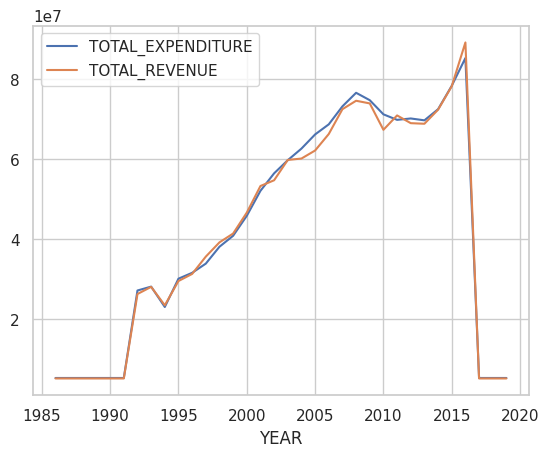

In [87]:
import pandas as pd
import matplotlib.pyplot as plt

# filter the dataframe to include only California data
df_ca = df_new[df_new['STATE'] == 'CALIFORNIA']

# plot the total expenditure and total revenue as line graphs
df_ca[['TOTAL_EXPENDITURE', 'TOTAL_REVENUE']].plot(kind='line')

plt.show()

#Budget Deficit = Total Expenditure by the Government - Total Income of the govenment.

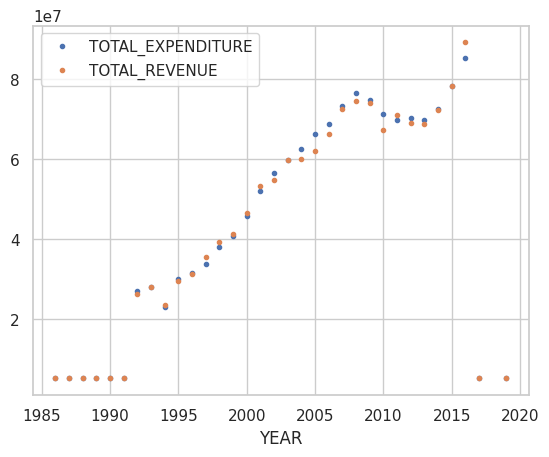

In [88]:
import pandas as pd
import matplotlib.pyplot as plt

# filter the dataframe to include only California data
df_ca = df_new[df_new['STATE'] == 'CALIFORNIA']

# plot the total expenditure and total revenue as line graphs
df_ca[['TOTAL_EXPENDITURE', 'TOTAL_REVENUE']].plot(kind='line', style='.')

plt.show()

#Budget Deficit = Total Expenditure by the Government - Total Income of the govenment.

- **Analyze the outliers of the above column**


- As figure shows there is an increase in deficit during the years of the great recession (2007-2009)
If the economy enters a recession taxes will fall as income and employement fall.
- At the same time, government spending will increase as people are given unemployement compensation and other transfer such as welfare payments.
- Such as automatic changes in revenue and expenditures work to increase the deficit.

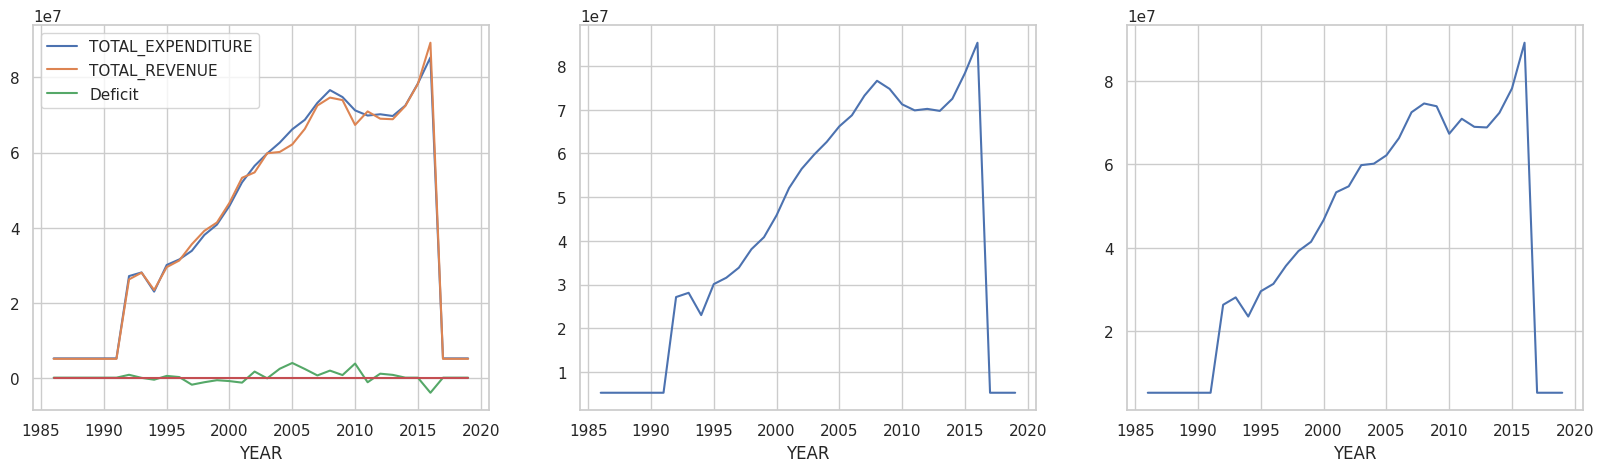

In [89]:
df_new['Deficit'] = df_new['TOTAL_EXPENDITURE'] - df_new['TOTAL_REVENUE']

fig, ax = plt.subplots(1,3, figsize=(20,5))
df_new.loc[df_new['STATE'] == 'CALIFORNIA',
           ['TOTAL_EXPENDITURE', 'TOTAL_REVENUE', 'Deficit']].plot(kind='line', ax=ax[0])

x = df_new.loc[df_new['STATE'] == 'CALIFORNIA', 'Deficit']
xx = np.zeros(len(x))
ax[0].plot(x.index, xx, ls='-')

df_new.loc[df_new['STATE'] == 'CALIFORNIA',
               'TOTAL_EXPENDITURE'].plot(kind='line', ax=ax[1])

df_new.loc[df_new['STATE'] == 'CALIFORNIA',
               'TOTAL_REVENUE'].plot(kind='line', ax=ax[2])

plt.show()


## **5.3. In your chosen state, in which of the lessons are the students more successful—math or reading?**

In [90]:
import pandas as pd
import os

def file_locator(file_name):
  main_dir = os.getcwd()

  for dir, folder, files in os.walk(main_dir):
    for file in files:
      if file == file_name:
        file_path = os.path.join(dir,file)
  return file_path

file_path = file_locator('states_all.csv')
df_for_grades = pd.read_csv(file_path)
df_for_grades.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.000000,304177.000000,1659028.000000,715680.000000,2653798.000000,1481703.000000,735036.000000,NaN,174053.000000,8224.000000,55460.000000,57948.000000,58025.000000,41167.000000,NaN,NaN,731634.000000,208.000000,252.000000,207.000000,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.000000,106780.000000,720711.000000,222100.000000,972488.000000,498362.000000,350902.000000,NaN,37451.000000,2371.000000,10152.000000,9748.000000,8789.000000,6714.000000,NaN,NaN,122487.000000,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.000000,297888.000000,1369815.000000,1590376.000000,3401580.000000,1435908.000000,1007732.000000,NaN,609114.000000,2544.000000,53497.000000,55433.000000,49081.000000,37410.000000,NaN,NaN,673477.000000,215.000000,265.000000,209.000000,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.000000,178571.000000,958785.000000,574603.000000,1743022.000000,964323.000000,483488.000000,NaN,145212.000000,808.000000,33511.000000,34632.000000,36011.000000,27651.000000,NaN,NaN,441490.000000,210.000000,256.000000,211.000000,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.000000,2072470.000000,16546514.000000,7641041.000000,27138832.000000,14358922.000000,8520926.000000,NaN,2044688.000000,59067.000000,431763.000000,418418.000000,363296.000000,270675.000000,NaN,NaN,5254844.000000,208.000000,261.000000,202.000000,NaN


In [91]:
df_for_grades[df_for_grades['STATE'] == 'CALIFORNIA'][['AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE','AVG_READING_4_SCORE', 'AVG_READING_8_SCORE']].describe()

,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,11.000000,12.000000,13.000000,11.000000
mean,227.909091,269.166667,208.230769,255.000000
std,8.960519,6.965282,5.614770,4.898979
min,208.000000,256.000000,197.000000,250.000000
25%,228.500000,265.500000,206.000000,251.000000
50%,232.000000,270.000000,209.000000,253.000000
75%,233.000000,275.250000,213.000000,259.000000
max,235.000000,277.000000,216.000000,263.000000


- In the State of California, in average, students performed better in **mathematics**

In [92]:
# filter the required portion of the data, group it by year and find the statistical description
# with this method you will find in which year student did better in math vs reading.

grades_comparision = df_for_grades.loc[df_for_grades['STATE']=='CALIFORNIA',
                                       ['AVG_MATH_4_SCORE', 
                                        'AVG_MATH_8_SCORE',
                                        'AVG_READING_4_SCORE', 
                                        'AVG_READING_8_SCORE',
                                        'YEAR']].groupby('YEAR'). describe()

grades_comparision

AVG_MATH_4_SCORE                                                  \
                count       mean std        min        25%        50%   
YEAR                                                                    
1986         0.000000        NaN NaN        NaN        NaN        NaN   
1987         0.000000        NaN NaN        NaN        NaN        NaN   
1988         0.000000        NaN NaN        NaN        NaN        NaN   
1989         0.000000        NaN NaN        NaN        NaN        NaN   
1990         0.000000        NaN NaN        NaN        NaN        NaN   
1991         0.000000        NaN NaN        NaN        NaN        NaN   
1992         1.000000 208.000000 NaN 208.000000 208.000000 208.000000   
1993         0.000000        NaN NaN        NaN        NaN        NaN   
1994         0.000000        NaN NaN        NaN        NaN        NaN   
1995         0.000000        NaN NaN        NaN        NaN        NaN   
1996         0.000000        NaN NaN        NaN        NaN        NaN   
1997         0.000000        NaN NaN        NaN        NaN        NaN   
1998         0.000000        NaN NaN        NaN        NaN        NaN   
1999         0.000000        NaN NaN        NaN        NaN        NaN   
2000         1.000000 213.000000 NaN 213.000000 213.000000 213.000000   
2001         0.000000        NaN NaN        NaN        NaN        NaN   
2002         0.000000        NaN NaN        NaN        NaN        NaN   
2003         1.000000 227.000000 NaN 227.000000 227.000000 227.000000   
2004         0.000000        NaN NaN        NaN        NaN        NaN   
2005         1.000000 230.000000 NaN 230.000000 230.000000 230.000000   
2006         0.000000        NaN NaN        NaN        NaN        NaN   
2007         1.000000 230.000000 NaN 230.000000 230.000000 230.000000   
2008         0.000000        NaN NaN        NaN        NaN        NaN   
2009         1.000000 232.000000 NaN 232.000000 232.000000 232.000000   
2010         0.000000        NaN NaN        NaN        NaN        NaN   
2011         1.000000 234.000000 NaN 234.000000 234.000000 234.000000   
2012         0.000000        NaN NaN        NaN        NaN        NaN   
2013         1.000000 234.000000 NaN 234.000000 234.000000 234.000000   
2014         0.000000        NaN NaN        NaN        NaN        NaN   
2015         1.000000 232.000000 NaN 232.000000 232.000000 232.000000   
2016         0.000000        NaN NaN        NaN        NaN        NaN   
2017         1.000000 232.000000 NaN 232.000000 232.000000 232.000000   
2019         1.000000 235.000000 NaN 235.000000 235.000000 235.000000   

                           AVG_MATH_8_SCORE                            \
            75%        max            count       mean std        min   
YEAR                                                                    
1986        NaN        NaN         0.000000        NaN NaN        NaN   
1987        NaN        NaN         0.000000        NaN NaN        NaN   
1988        NaN        NaN         0.000000        NaN NaN        NaN   
1989        NaN        NaN         0.000000        NaN NaN        NaN   
1990        NaN        NaN         1.000000 256.000000 NaN 256.000000   
1991        NaN        NaN         0.000000        NaN NaN        NaN   
1992 208.000000 208.000000         1.000000 261.000000 NaN 261.000000   
1993        NaN        NaN         0.000000        NaN NaN        NaN   
1994        NaN        NaN         0.000000        NaN NaN        NaN   
1995        NaN        NaN         0.000000        NaN NaN        NaN   
1996        NaN        NaN         0.000000        NaN NaN        NaN   
1997        NaN        NaN         0.000000        NaN NaN        NaN   
1998        NaN        NaN         0.000000        NaN NaN        NaN   
1999        NaN        NaN         0.000000        NaN NaN        NaN   
2000 213.000000 213.000000         1.000000 260.000000 NaN 260.000000   
2001        NaN        NaN         0.000000        NaN NaN    

- Notive that there are many missing values in this variables (more than 50%)
- Let's remove them

In [93]:
#keep the rows at least 8 values
grades_comparision.dropna(thresh=8).transpose()

YEAR                            1990       1992       1994       1998  \
AVG_MATH_4_SCORE    count   0.000000   1.000000   0.000000   0.000000   
                    mean         NaN 208.000000        NaN        NaN   
                    std          NaN        NaN        NaN        NaN   
                    min          NaN 208.000000        NaN        NaN   
                    25%          NaN 208.000000        NaN        NaN   
                    50%          NaN 208.000000        NaN        NaN   
                    75%          NaN 208.000000        NaN        NaN   
                    max          NaN 208.000000        NaN        NaN   
AVG_MATH_8_SCORE    count   1.000000   1.000000   0.000000   0.000000   
                    mean  256.000000 261.000000        NaN        NaN   
                    std          NaN        NaN        NaN        NaN   
                    min   256.000000 261.000000        NaN        NaN   
                    25%   256.000000 261.000000        NaN        NaN   
                    50%   256.000000 261.000000        NaN        NaN   
                    75%   256.000000 261.000000        NaN        NaN   
                    max   256.000000 261.000000        NaN        NaN   
AVG_READING_4_SCORE count   0.000000   1.000000   1.000000   1.000000   
                    mean         NaN 202.000000 197.000000 202.000000   
                    std          NaN        NaN        NaN        NaN   
                    min          NaN 202.000000 197.000000 202.000000   
                    25%          NaN 202.000000 197.000000 202.000000   
                    50%          NaN 202.000000 197.000000 202.000000   
                    75%          NaN 202.000000 197.000000 202.000000   
                    max          NaN 202.000000 197.000000 202.000000   
AVG_READING_8_SCORE count   0.000000   0.000000   0.000000   1.000000   
                    mean         NaN        NaN        NaN 252.000000   
                    std          NaN        NaN        NaN        NaN   
                    min          NaN        NaN        NaN 252.000000   
                    25%          NaN        NaN        NaN 252.000000   
                    50%          NaN        NaN        NaN 252.000000   
                    75%          NaN        NaN        NaN 252.000000   
                    max          NaN        NaN        NaN 252.000000   

YEAR                            2000       2002       2003       2005  \
AVG_MATH_4_SCORE    count   1.000000   0.000000   1.000000   1.000000   
                    mean  213.000000        NaN 227.000000 230.000000   
                    std          NaN        NaN        NaN        NaN   
                    min   213.000000        NaN 227.000000 230.000000   
                    25%   213.000000        NaN 227.000000 230.000000   
                    50%   213.000000        NaN 227.000000 230.000000   
                    75%   213.000000        NaN 227.000000 230.000000   
                    max   213.000000        NaN 227.000000 230.000000   
AVG_MATH_8_SCORE    count   1.000000   0.000000   1.000000   1.000000   
                    mean  260.000000        NaN 267.000000 269.000000   
                    std          NaN        NaN        NaN        NaN   
                    min   260.000000        NaN 267.000000 269.000000   
                    25%   260.000000        NaN 267.000000 269.000000   
                    50%   260.000000        NaN 267.000000 269.000000   
                    75%   260.000000        NaN 267.000000 269.000000   
                    max   260.000000        NaN 267.000000 269.000000   
AVG_READING_4_SCORE count   0.000000   1.000000   1.000000   1.000000   
                    mean         NaN 206.000000 206.000000 207.000000   
                    std          NaN        NaN        NaN        NaN   
                    min          NaN 206.000000 206.000000 207.000000   
                    25%          NaN 206.000000 206.00000

## **5.4. What are the distributions of the math and reading scores in the sample?**

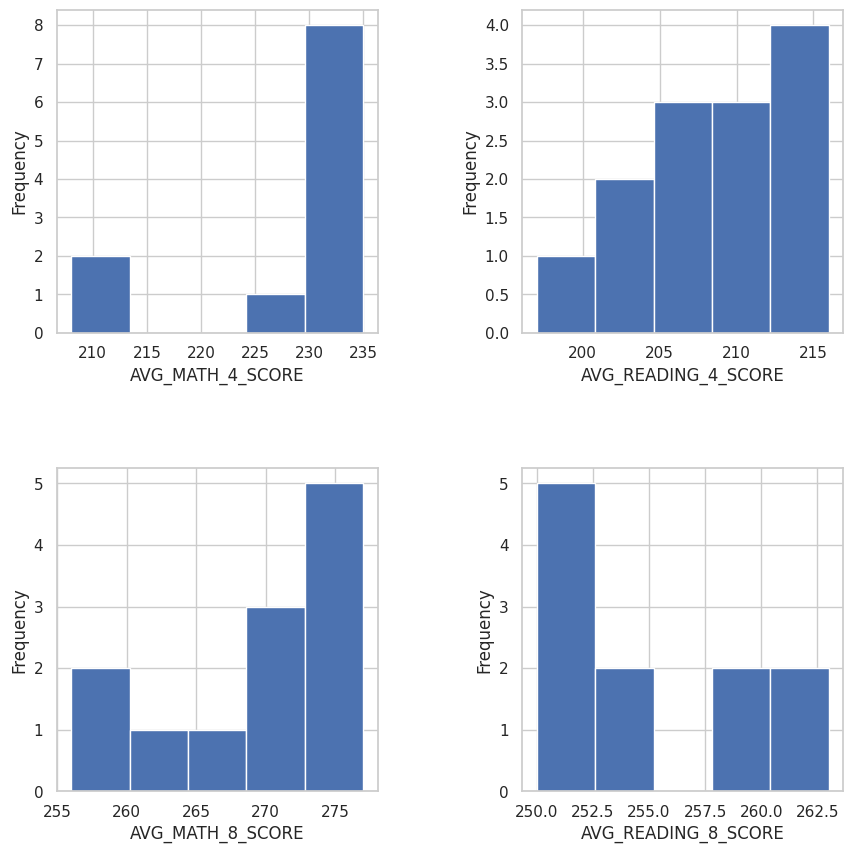

In [94]:
#looking for the rows whose values in the state column is california
fig, ax = plt.subplots(2,2, figsize=(10,10))

df_for_grades[df_for_grades['STATE'] == 'CALIFORNIA']['AVG_MATH_4_SCORE'].plot(kind='hist',
                                                                               bins=5,
                                                                               ax=ax[0,0])

df_for_grades[df_for_grades['STATE'] == 'CALIFORNIA']['AVG_READING_4_SCORE'].plot(kind='hist',
                                                                               bins=5,
                                                                               ax=ax[0,1])

df_for_grades[df_for_grades['STATE'] == 'CALIFORNIA']['AVG_MATH_8_SCORE'].plot(kind='hist',
                                                                               bins=5,
                                                                               ax=ax[1,0])

df_for_grades[df_for_grades['STATE'] == 'CALIFORNIA']['AVG_READING_8_SCORE'].plot(kind='hist',
                                                                               bins=5,
                                                                               ax=ax[1,1])

ax[0,0].set_xlabel('AVG_MATH_4_SCORE')
ax[0,1].set_xlabel('AVG_READING_4_SCORE')
ax[1,0].set_xlabel('AVG_MATH_8_SCORE')
ax[1,1].set_xlabel('AVG_READING_8_SCORE')

plt.tight_layout(pad=5.0)
plt.show()

### **5.5. Now, look again at the original dataset (before you filled in the missing values). Notice there are too many missing values for math and reading scores. Fill out the missing values using mean, median, and linear interpolation. Then, compare the effects of these techniques on the distributions of the score variables.**

In [95]:
import pandas as pd
import os

def file_locator(file_name):
  main_dir = os.getcwd()

  for dir, folder, files in os.walk(main_dir):
    for file in files:
      if file == file_name:
        file_path = os.path.join(dir,file)
  return file_path

file_path = file_locator('states_all.csv')
df_for_grades = pd.read_csv(file_path)
df_for_grades.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.000000,304177.000000,1659028.000000,715680.000000,2653798.000000,1481703.000000,735036.000000,NaN,174053.000000,8224.000000,55460.000000,57948.000000,58025.000000,41167.000000,NaN,NaN,731634.000000,208.000000,252.000000,207.000000,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.000000,106780.000000,720711.000000,222100.000000,972488.000000,498362.000000,350902.000000,NaN,37451.000000,2371.000000,10152.000000,9748.000000,8789.000000,6714.000000,NaN,NaN,122487.000000,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.000000,297888.000000,1369815.000000,1590376.000000,3401580.000000,1435908.000000,1007732.000000,NaN,609114.000000,2544.000000,53497.000000,55433.000000,49081.000000,37410.000000,NaN,NaN,673477.000000,215.000000,265.000000,209.000000,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.000000,178571.000000,958785.000000,574603.000000,1743022.000000,964323.000000,483488.000000,NaN,145212.000000,808.000000,33511.000000,34632.000000,36011.000000,27651.000000,NaN,NaN,441490.000000,210.000000,256.000000,211.000000,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.000000,2072470.000000,16546514.000000,7641041.000000,27138832.000000,14358922.000000,8520926.000000,NaN,2044688.000000,59067.000000,431763.000000,418418.000000,363296.000000,270675.000000,NaN,NaN,5254844.000000,208.000000,261.000000,202.000000,NaN


In [96]:
cols = ['AVG_MATH_4_SCORE','AVG_MATH_8_SCORE', 'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE']
df_for_grades[cols].isnull().sum()

AVG_MATH_4_SCORE       1150
AVG_MATH_8_SCORE       1113
AVG_READING_4_SCORE    1065
AVG_READING_8_SCORE    1153
dtype: int64

In [97]:
df_for_grades_imputed_median = df_for_grades.copy(deep=True)

# define columns to impute
cols = ['AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE', 'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE']

# impute missing values with the median of each column
for col in cols:
    median = df_for_grades_imputed_median[col].median()
    df_for_grades_imputed_median[col].fillna(median, inplace=True)

# check if there are any remaining missing values
print(df_for_grades_imputed_median[cols].isnull().sum())


AVG_MATH_4_SCORE       0
AVG_MATH_8_SCORE       0
AVG_READING_4_SCORE    0
AVG_READING_8_SCORE    0
dtype: int64


In [98]:
df_for_grades_imputed_mean = df_for_grades.copy(deep=True)

# define columns to impute
cols = ['AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE', 'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE']

# impute missing values with the median of each column
for col in cols:
    mean = df_for_grades_imputed_mean[col].mean()
    df_for_grades_imputed_mean[col].fillna(mean, inplace=True)

# check if there are any remaining missing values
print(df_for_grades_imputed_mean[cols].isnull().sum())

AVG_MATH_4_SCORE       0
AVG_MATH_8_SCORE       0
AVG_READING_4_SCORE    0
AVG_READING_8_SCORE    0
dtype: int64


In [99]:
df_for_grades_interpolated = df_for_grades.copy(deep=True)

for col in ['AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE', 'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE']:
  df_for_grades_interpolated[col] = df_for_grades_interpolated[col].interpolate(method = 'linear', limit_direction = 'both')

df_for_grades_interpolated[cols].isnull().sum()

AVG_MATH_4_SCORE       0
AVG_MATH_8_SCORE       0
AVG_READING_4_SCORE    0
AVG_READING_8_SCORE    0
dtype: int64

In [100]:
def dist_visualization(df, title, state, cols):

    fig, ax = plt.subplots(1,4, figsize=(20,5))
    index=0
    for i in cols:
        df[df['STATE'] == state][i].plot(kind='hist',
                                        bins=5,
                                        ax=ax[index])
        ax[index].set_xlabel(i)
        ax[index].set_title(f'{title}')
        index+=1

    plt.tight_layout()
    plt.show()


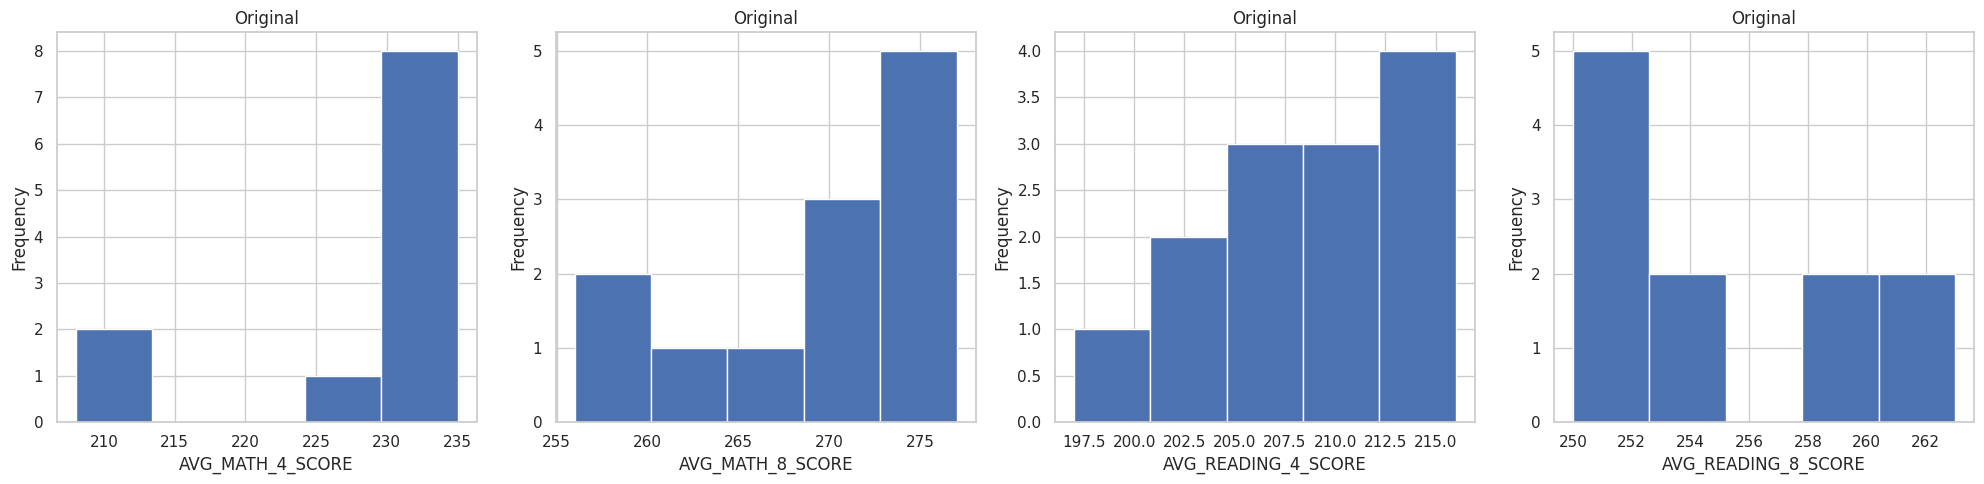

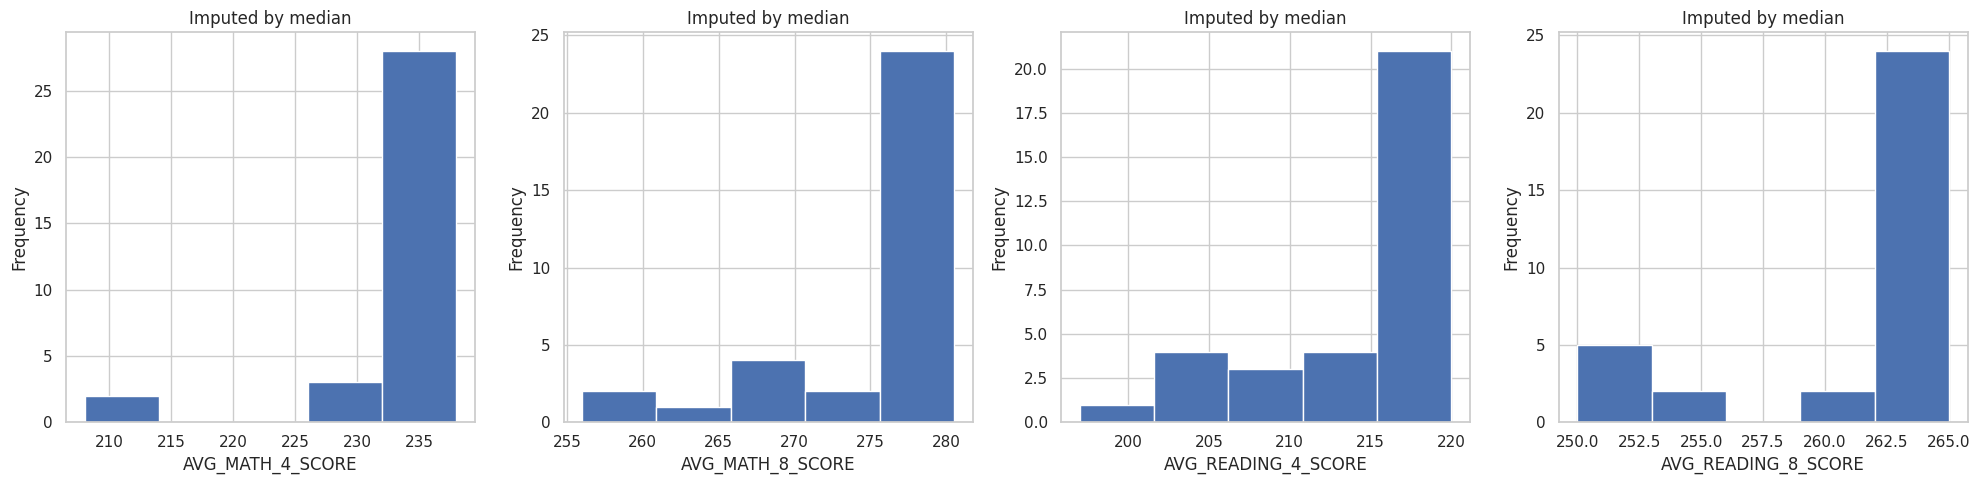

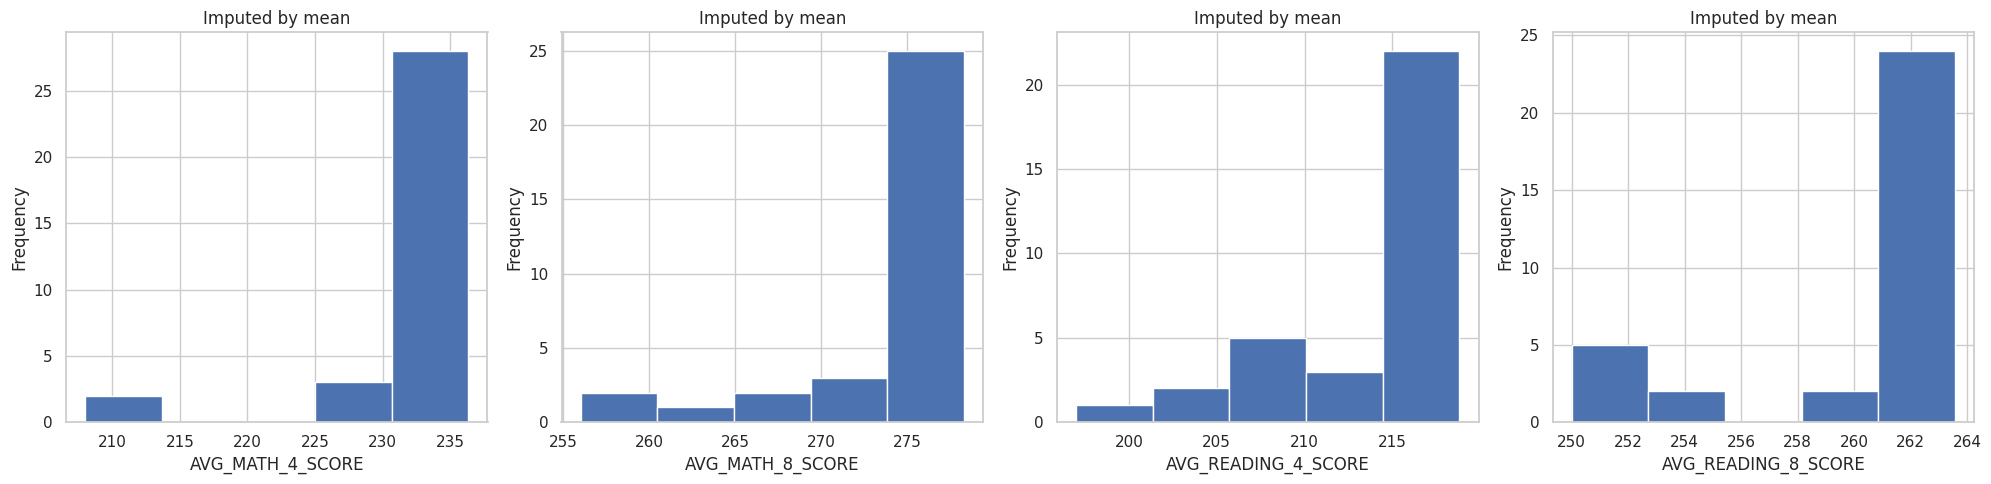

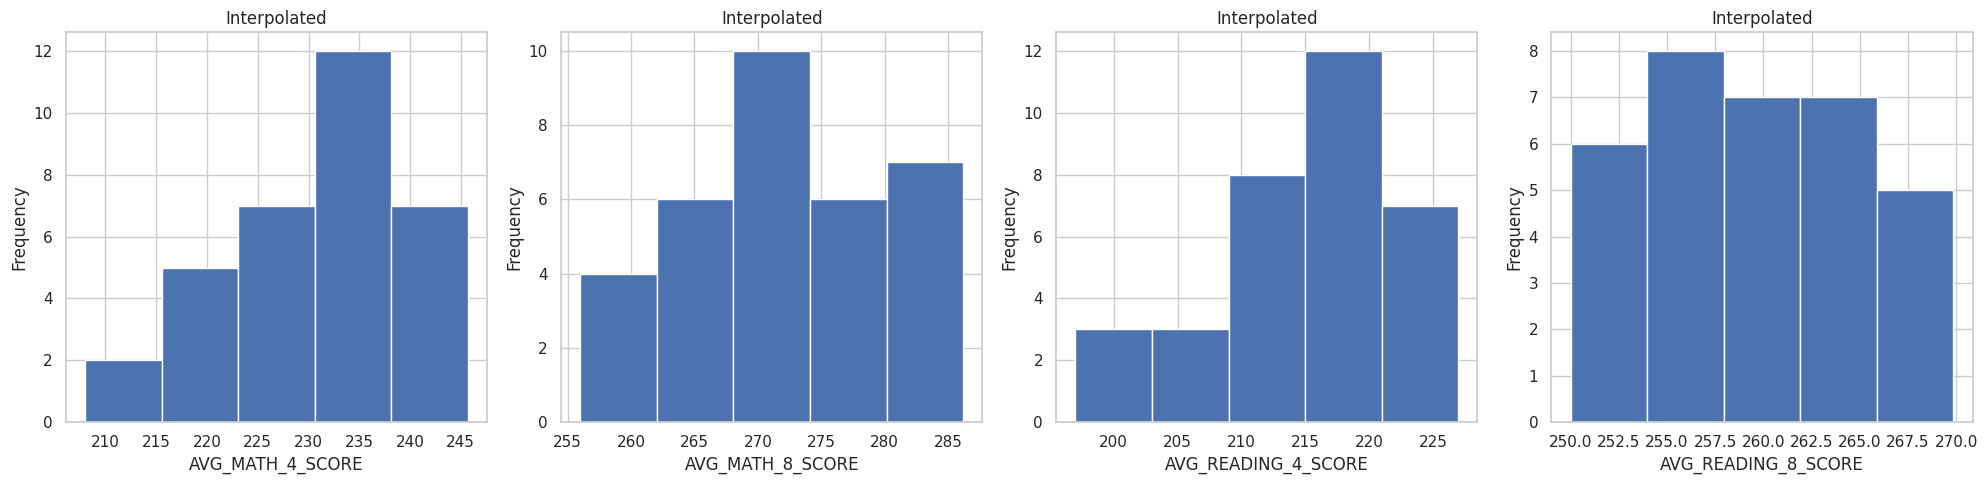

In [101]:
cols = ['AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE', 'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE']
state = 'CALIFORNIA'

dist_visualization(df_for_grades, title = 'Original', state=state, cols=cols)
dist_visualization(df_for_grades_imputed_median, title = 'Imputed by median', state=state, cols=cols)
dist_visualization(df_for_grades_imputed_mean, title = 'Imputed by mean', state=state, cols=cols)
dist_visualization(df_for_grades_interpolated, title = 'Interpolated', state=state, cols=cols)

In [102]:
df_for_grades[cols].describe()

,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,565.000000,602.000000,650.000000,562.000000
mean,236.327434,278.280731,218.806154,263.558719
std,9.285505,10.343482,7.681805,6.612601
min,192.000000,231.000000,179.000000,236.000000
25%,232.000000,272.000000,215.000000,260.000000
50%,238.000000,280.500000,220.000000,265.000000
75%,242.000000,286.000000,224.000000,268.000000
max,253.000000,301.000000,237.000000,280.000000


In [103]:
df_for_grades_imputed_median[cols].describe()

,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1715.000000,1715.000000,1715.000000,1715.000000
mean,237.448980,279.720991,219.547522,264.527697
std,5.384205,6.215863,4.762313,3.843150
min,192.000000,231.000000,179.000000,236.000000
25%,238.000000,280.500000,220.000000,265.000000
50%,238.000000,280.500000,220.000000,265.000000
75%,238.000000,280.500000,220.000000,265.000000
max,253.000000,301.000000,237.000000,280.000000


In [104]:
df_for_grades_imputed_mean[cols].describe()

,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1715.000000,1715.000000,1715.000000,1715.000000
mean,236.327434,278.280731,218.806154,263.558719
std,5.326473,6.124894,4.726942,3.783105
min,192.000000,231.000000,179.000000,236.000000
25%,236.327434,278.280731,218.806154,263.558719
50%,236.327434,278.280731,218.806154,263.558719
75%,236.327434,278.280731,218.806154,263.558719
max,253.000000,301.000000,237.000000,280.000000


In [105]:
df_for_grades_interpolated[cols].describe()

,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1715.000000,1715.000000,1715.000000,1715.000000
mean,232.919825,274.688047,218.510787,261.540525
std,9.299444,8.688255,6.117771,5.952766
min,192.000000,231.000000,179.000000,236.000000
25%,224.251397,269.000000,215.000000,255.000000
50%,235.000000,274.000000,219.192308,261.714286
75%,240.307692,281.000000,222.571429,266.153846
max,253.000000,301.000000,237.000000,280.000000


##**6. CONCLUSION**

Interpolation can be a useful method for handling missing values, but whether it is a good method depends on the specific context and data. 

Interpolation involves estimating the missing values based on the values of adjacent points or data. There are various methods for interpolation such as;
- linear interpolation
- polynomial interpolation
- spline interpolation

Interpolation can be useful if the missing values are few in number and scattered throughout the data. In this case, interpolation can provide a reasonable estimate of the missing values and help preserve the overall structure of the data.
However, if there are too many missing values, interpolation may not be the best method for handling them. In such cases, interpolation may introduce bias and inaccuracies in the data, and may not accurately represent the true nature of the data. Additionally, interpolation can also be influenced by outliers in the data, which can further affect the accuracy of the imputed values.

Other methods for handling missing values include;
- mean imputation
- mode imputation
- hot-deck imputation

The choice of method depends on the specific data and context, and it is often recommended to explore multiple methods and compare their performance before making a final decision. 

#**6.   MULTIVARIATE ANALYSIS**

In this assignment, you will continue to study the data of the US Education System (dataset). You can reach the explanations of this data from Kaggle again.


1. Does the performance in the exams vary according to gender, origin and education level of parents?
2. Does lunch type have a relationship with exam performances? How can you explain this, if any?
3. Does the preparation courses have an impact on exam performance?
4. Which lessons are most correlated with each other?

## **6.A. Data Preprocessing**

### **6.A.1 Importing Libraries & Dataset**

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import scipy.stats.mstats as winsorize
from sqlalchemy import create_engine
import warnings
import matplotlib
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [107]:
pd.options.display.float_format = '{:.2f}'.format
plt.rcParams['figure.dpi'] = 100

In [108]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import os

def file_locator(file_name):
  main_dir = os.getcwd()

  for dir, folder, files in os.walk(main_dir):
    for file in files:
      if file == file_name:
        file_path = os.path.join(dir,file)
  return file_path

file_path = file_locator('StudentsPerformance.csv')
df_extended = pd.read_csv(file_path)
df_extended.sample(10).style.set_properties(**{'background-color': '#802000','color': 'white'})

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
170,male,group A,high school,standard,completed,72,73,74
533,female,group E,associate's degree,standard,completed,79,88,94
641,female,group D,associate's degree,free/reduced,completed,74,88,90
691,female,group E,associate's degree,free/reduced,none,73,76,78
142,female,group E,some college,free/reduced,completed,42,55,54
205,male,group D,some high school,standard,completed,74,71,78
797,female,group E,associate's degree,free/reduced,none,70,84,81
321,female,group E,high school,standard,none,75,86,79
200,female,group C,associate's degree,standard,completed,67,84,86
351,male,group E,some college,standard,none,66,57,52


###**6.A.2. Data Preparation**

In [109]:
df_extended.isna().sum()*100/len(df_extended)

gender                        0.00
race/ethnicity                0.00
parental level of education   0.00
lunch                         0.00
test preparation course       0.00
math score                    0.00
reading score                 0.00
writing score                 0.00
dtype: float64

In [110]:
df_extended.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 8 entries, gender to writing score
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [111]:
df_extended.describe(include='O')

,gender,race/ethnicity,parental level of education,lunch,test preparation course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,female,group C,some college,standard,none
freq,518,319,226,645,642


In [112]:
for col in df_extended.columns.to_list():
  if col not in ['PRIMARY_KEY' 'STATE']:
    df_extended[col] = df_extended[col].fillna(df_extended[col].median)

## **6.1. Does the performance in the exams vary according to gender, origin and education level of parents?**

In [113]:
print(df_extended.gender.unique())
print(df_extended['race/ethnicity'].unique())
print(df_extended['parental level of education'].unique())

['female' 'male']
['group B' 'group C' 'group A' 'group D' 'group E']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


In [114]:
df_extended.gender = np.where(df_extended.gender=='female',1,0)
print(df_extended.gender.unique())

[1 0]


In [115]:
df_extended['race/ethnicity'] = df_extended['race/ethnicity'].astype('category').cat.codes
print(df_extended['race/ethnicity'].unique())

[1 2 0 3 4]


In [116]:
df_extended['parental level of education'] = np.where((df_extended['parental level of education']=='some high school')|(df_extended['parental level of education']=='high school'), 1, df_extended['parental level of education'])
df_extended['parental level of education'] = np.where((df_extended['parental level of education']=="associate's degree")|(df_extended['parental level of education']=="bachelor's degree")|(df_extended['parental level of education']=="some college"),2,df_extended['parental level of education'])
df_extended['parental level of education'] = np.where(df_extended['parental level of education']=="master's degree",3,df_extended['parental level of education'])
df_extended.rename(columns={'parental level of education':'parental_education'}, inplace=True)
df_extended['parental_education'].unique()


array([2, 3, 1], dtype=object)

In [117]:
df_extended['parental_education'] = df_extended['parental_education'].astype(int)

In [118]:
df_extended['test preparation course'] = np.where(df_extended['test preparation course'] == 'completed',1,0)
print(df_extended['test preparation course'].unique())

[0 1]


In [119]:
df_extended['lunch'] = np.where(df_extended['lunch'] == 'standard',1,0)
print(df_extended['lunch'].unique())

[1 0]


In [120]:
coll = df_extended.columns.tolist()
coll

['gender',
 'race/ethnicity',
 'parental_education',
 'lunch',
 'test preparation course',
 'math score',
 'reading score',
 'writing score']

In [134]:
df_extended[coll].corr()

,gender,race/ethnicity,parental_education,lunch,test preparation course,math score,reading score,writing score
gender,1.00,0.00,0.05,-0.02,-0.01,-0.17,0.24,0.30
race/ethnicity,0.00,1.00,0.12,0.05,0.02,0.22,0.15,0.17
parental_education,0.05,0.12,1.00,-0.02,0.00,0.17,0.19,0.24
lunch,-0.02,0.05,-0.02,1.00,-0.02,0.35,0.23,0.25
test preparation course,-0.01,0.02,0.00,-0.02,1.00,0.18,0.24,0.31
math score,-0.17,0.22,0.17,0.35,0.18,1.00,0.82,0.80
reading score,0.24,0.15,0.19,0.23,0.24,0.82,1.00,0.95
writing score,0.30,0.17,0.24,0.25,0.31,0.80,0.95,1.00


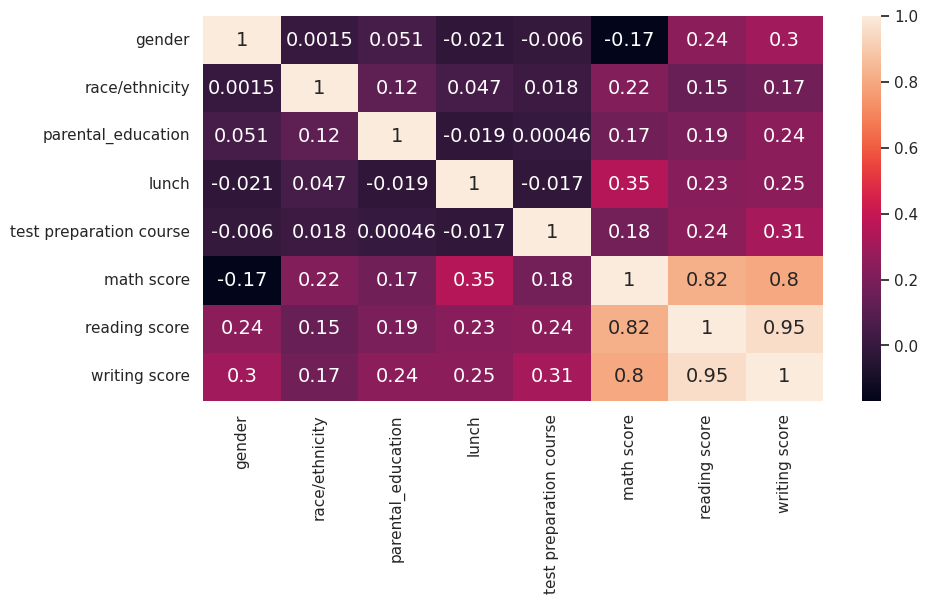

In [121]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.heatmap(data=df_extended[coll].corr(), annot=True)
plt.show()


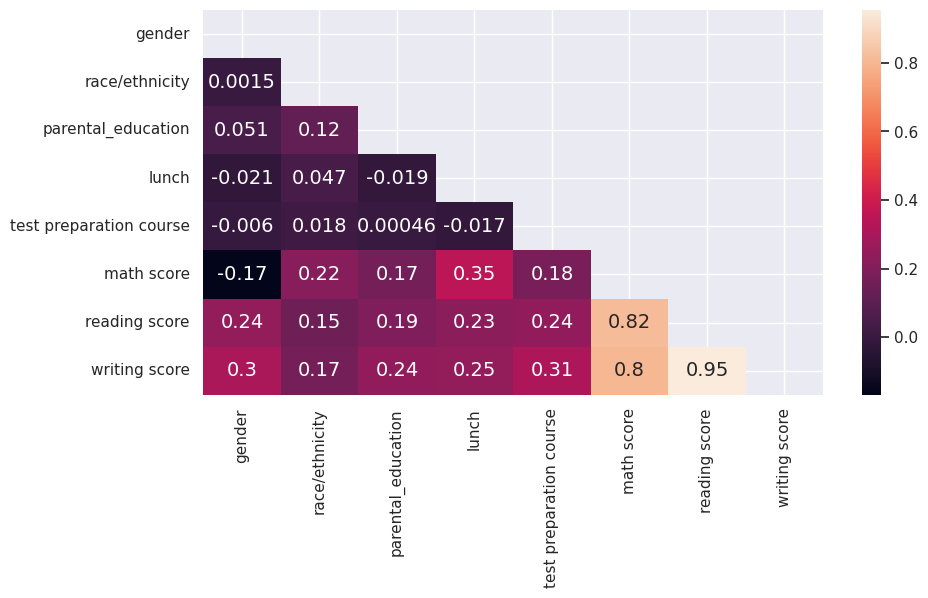

In [135]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.heatmap(data=df_extended.corr(), annot=True, mask=np.triu(df_extended.corr()))
plt.show()

In [123]:
df_extended.isna().sum()*100/len(df_extended)

gender                    0.00
race/ethnicity            0.00
parental_education        0.00
lunch                     0.00
test preparation course   0.00
math score                0.00
reading score             0.00
writing score             0.00
dtype: float64

## **6.2. Does lunch type have a relationship with exam performance? How can you explain this, if any**

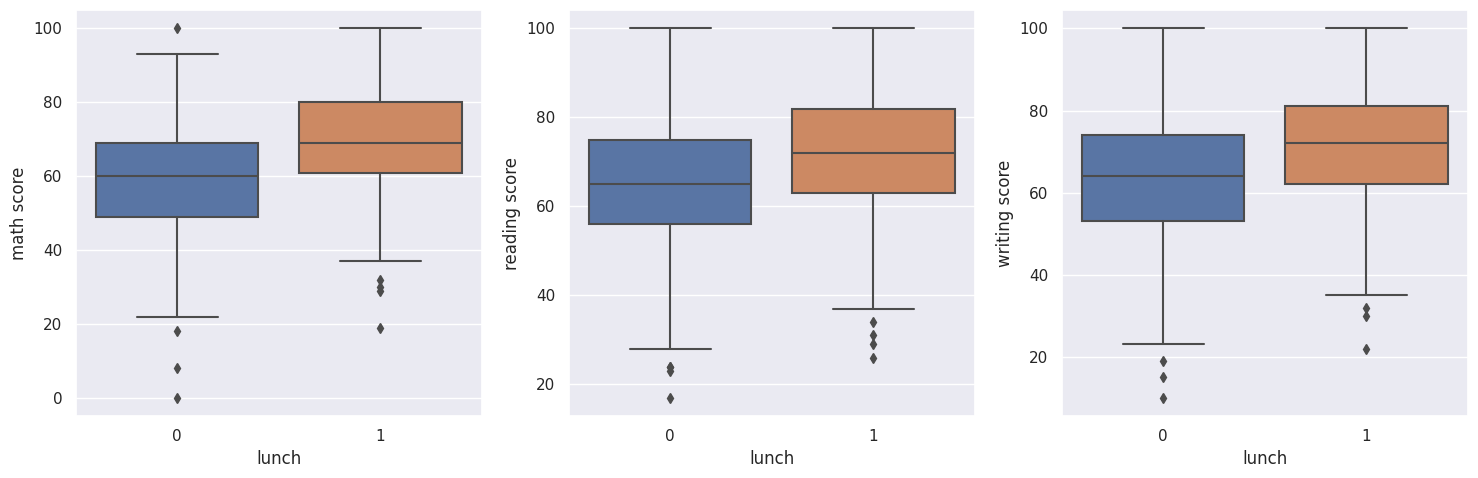

In [124]:
import seaborn as sns
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.boxplot(x='lunch', y='math score', data=df_extended)
plt.subplot(1,3,2)
sns.boxplot(x='lunch', y='reading score', data=df_extended)
plt.subplot(1,3,3)
sns.boxplot(x='lunch', y='writing score', data=df_extended)

plt.tight_layout()
plt.show()